# Desafío Spike 01/08/2021
Matheus Pinto Arratia

En este desafío vamos a ver si somos capaces de predecir el precio de un insumo básico, como la leche, a partir de variables climatológicas y macroeconómicas. No siempre estos datos nos entregan toda la información que nos gustaría, como por ejemplo señales claras del avance de la sequía a lo largo del país, sin embargo, nos permite entender otro tipo de efectos, como movimientos en ciertos sectores de la economía. En esta línea, te iremos guiando para construir un análisis y algunos modelos que nos ayuden a concluir.

Versión de python utilizada: 3.8.0

Moverme al direcorio de raiz donde trabajaré el proyecto el directorio raiz es en path+/challenge/

In [1]:
import os
os.chdir(r"C:\Users\mateu\Desktop\portafolio\challenge")
print(os.listdir())

['.git', '.gitignore', 'codes', 'data', 'images', 'main_jupyter.py', 'README.md', 'requirements.txt', 'results', 'src']


In [2]:
%matplotlib inline
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
from datetime import datetime
from src.eda.fast_eda import profiling_report
from src.preprocessing.cleaner import (drop_spaces_data, replace_empty_nans, values_treatement)
warnings.filterwarnings("ignore")

# 1. Datos Precipitaciones e Indicadores Económicos Banco Central

En esta sección haré el análisis exploratorio de los datos, por favor antes de empezar, setee el path de la carpeta como variable de ambiente, para poder ocupar las librerías construidas para este trabajo.

In [3]:
# paths
path_bc = "data/raw/banco_central.csv"
path_pr = "data/raw/precipitaciones.csv"

In [4]:
# cargar los datos
df_pr = pd.read_csv(path_pr)

# 2. Análisis de datos. Creación de variables

Extraer reportes de análisis exploratorias a través de la libreria pandas-profilling resultado en carpeta resutls/eda_{filname}.html en los siguientes links 

In [5]:
# Análisis Exploratorio Banco Central ver link: 
# profiling_report(path_bc, minimal_mode=False, dark_mode=True, filename="banco_central")

In [6]:
# Análisis Exploratorio Precipitaciones ver link: 
# profiling_report(path_pr, minimal_mode=False, dark_mode=True, filename="precipitaciones")

Estos análisis exploratorios son super completos y nos ayudan a entender de manera visual el dataset con el que estamos trabajando, se realizan profiling reports tanto para el dataset de precipitaciones, como el de indicadores ecónomicos.

### Dataset de precipitaciones :

In [7]:
df_pr.sort_values(by=["date"], ascending=True, inplace=True)
df_pr.reset_index(drop=True, inplace=True)
df_pr.head(10)

date   Coquimbo  Valparaiso  Metropolitana_de_Santiago  \
0  1979-01-01   2.641948    0.587062                   2.447114   
1  1979-02-01   1.179804    2.432192                   3.997852   
2  1979-03-01   0.255490    0.020601                   0.000000   
3  1979-04-01  10.173699   11.745779                  13.722349   
4  1979-05-01   1.039098   18.609286                  50.187148   
5  1979-06-01   0.141157    0.000000                   1.397164   
6  1979-07-01  34.630791  118.340422                 170.614262   
7  1979-08-01   9.073373   49.270309                 130.503624   
8  1979-09-01  12.041765   33.970292                  77.705101   
9  1979-10-01   0.018634    0.558101                  10.871275   

   Libertador_Gral__Bernardo_O_Higgins       Maule      Biobio  La_Araucania  \
0                             1.608992    3.736215   17.859634     25.212940   
1                             4.346310   16.347637   17.680612     18.085072   
2                             0.055488    0.545324   14.435698     28.696504   
3                            12.989194   21.880607   39.136483     43.617921   
4                           104.451550  143.914334  219.729235    279.409718   
5                             7.378558   28.797945   72.501902    113.488705   
6                           301.256558  482.199009  411.270877    356.070480   
7                           200.210387  294.567554  378.102706    458.753077   
8                           156.477457  161.299858  158.965598    203.191759   
9                            14.557008   11.238902   51.010499    121.420487   

     Los_Rios  
0   45.596447  
1   34.075039  
2   66.232248  
3   73.548127  
4  438.005116  
5  179.949832  
6  424.988334  
7  645.763592  
8  252.733618  
9  177.008294

Esta data tiene la información de precipitaciones por mes en las regiones de Coquimbo, Valparaiso, Santiago, O'Higgins, Maule, Bio-bio, La Araucania y Los Rios, la unidad estadar de medición de precipitación son [mm].

In [8]:
# Convertir columna fecha a timestamps
date_format = "%Y-%m-%d"
df_pr["date"] = df_pr["date"].apply(lambda x: datetime.strptime(x, date_format))

In [9]:
# Fechas comprendidas en los datos
print("Fecha inicial:", df_pr["date"].min())
print("Fecha final:", df_pr["date"].max())
print("Cantidad de días del periodo:", (df_pr["date"].max() - df_pr["date"].min()).days)

Fecha inicial: 1979-01-01 00:00:00
Fecha final: 2020-04-01 00:00:00
Cantidad de días del periodo: 15066


La información está disponible desde 01/1979 hasta 04/2020 y no contiene ningún mes faltante

In [10]:
months_quantity = (2020 - 1979) * 12 + 4
print("Cantidad de meses que debiese haber:", months_quantity)

Cantidad de meses que debiese haber: 496


In [11]:
df_pr.describe(include='all')

date    Coquimbo  Valparaiso  \
count                   496  496.000000  496.000000   
unique                  496         NaN         NaN   
top     1979-01-01 00:00:00         NaN         NaN   
freq                      1         NaN         NaN   
first   1979-01-01 00:00:00         NaN         NaN   
last    2020-04-01 00:00:00         NaN         NaN   
mean                    NaN   16.154691   32.450980   
std                     NaN   32.629286   55.434330   
min                     NaN    0.000000    0.000000   
25%                     NaN    0.821521    1.538162   
50%                     NaN    4.071036    9.037825   
75%                     NaN   16.137600   38.409213   
max                     NaN  347.133889  441.048604   

        Metropolitana_de_Santiago  Libertador_Gral__Bernardo_O_Higgins  \
count                  496.000000                           496.000000   
unique                        NaN                                  NaN   
top                           NaN                                  NaN   
freq                          NaN                                  NaN   
first                         NaN                                  NaN   
last                          NaN                                  NaN   
mean                    49.666682                            72.249805   
std                     74.361099                           101.426112   
min                      0.000000                             0.000000   
25%                      5.297546                             5.343992   
50%                     19.087592                            25.995969   
75%                     63.408364                           101.875093   
max                    524.592667                           645.515752   

             Maule      Biobio  La_Araucania    Los_Rios  
count   496.000000  496.000000    496.000000  496.000000  
unique         NaN         NaN           NaN         NaN  
top            NaN         NaN           NaN         NaN  
freq           NaN         NaN           NaN         NaN  
first          NaN         NaN           NaN         NaN  
last           NaN         NaN           NaN         NaN  
mean     98.662773  128.113406    151.486456  199.451789  
std     122.766771  130.056094    126.628503  140.073615  
min       0.000000    0.001170      0.005331    0.748127  
25%      11.897363   29.356684     52.930343   89.805643  
50%      45.649888   79.558557    110.570990  159.467940  
75%     142.230716  184.751307    208.316243  274.594590  
max     759.177712  702.434707    661.211203  717.735673

Como pueden ver en el directorio results/eda_{filename}.html se encuentran los análsisis exploratorios realizados a los datos, estos .html continen una análisis más profundo exploratorio, de los datasets entregados por Spike.

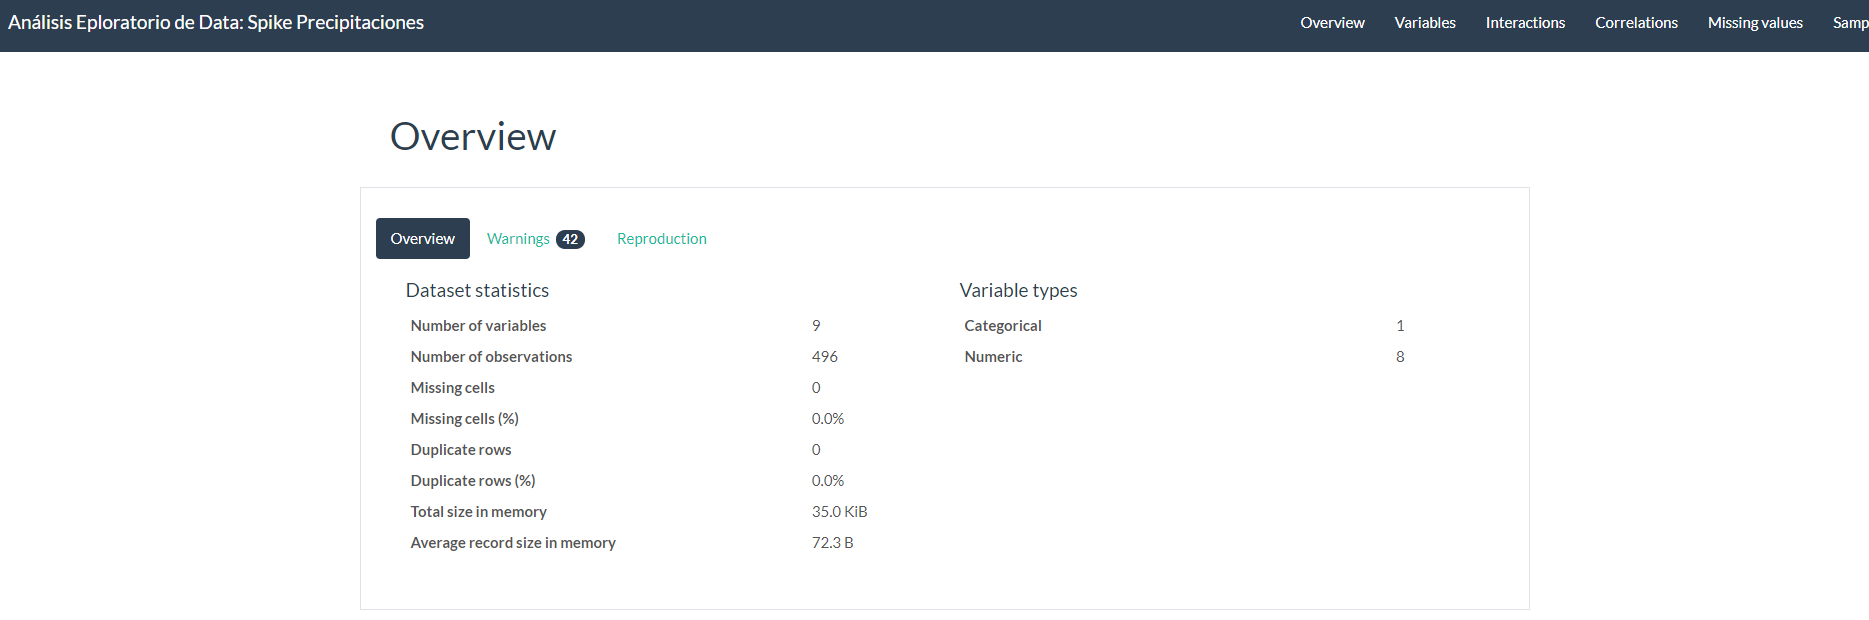

Del dataset en general, 9 features, 8 de las cuales son númericas y 1 categorica (fecha), 496 observaciones, no contiene duplicados y tampoco valores faltantes en el espacio de datos entregados (496 meses)

**Columna fecha**

La información a nivel de la columna fecha esta completa, tal y como se muestran unas celdas más arriba

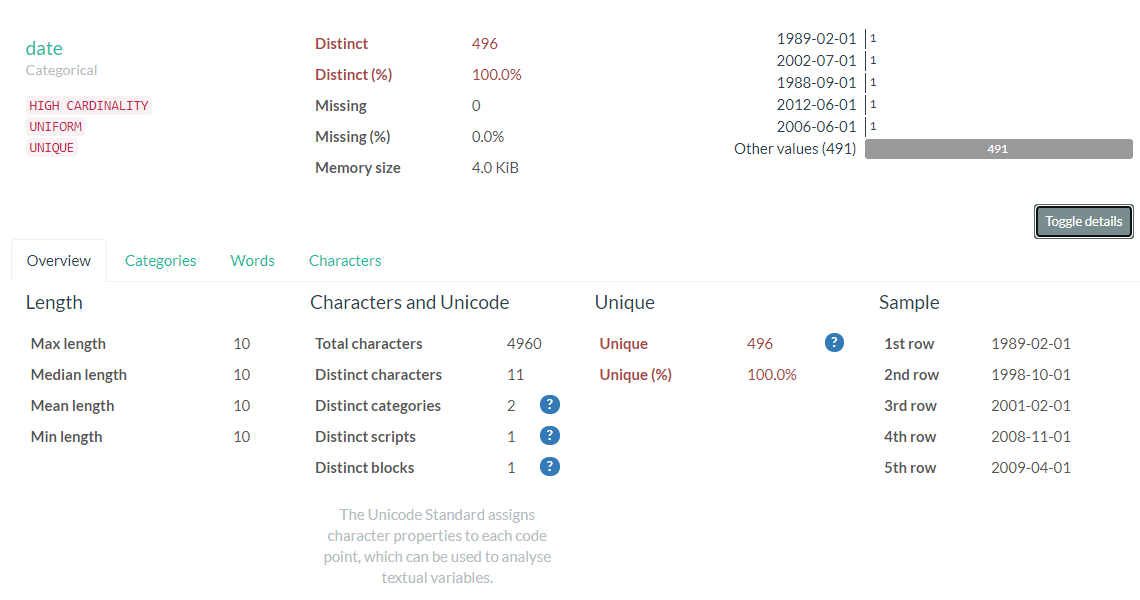

**Columnas de precipitación** 

Las columnas de precipitaciones, tienen distribuciones sesgadas a la izquierda, lo que es logico dentro de un clima mediterraneo, donde la mayor parte del año no posee precipitaciones. Existe variabilidad entre las regiones analizadas

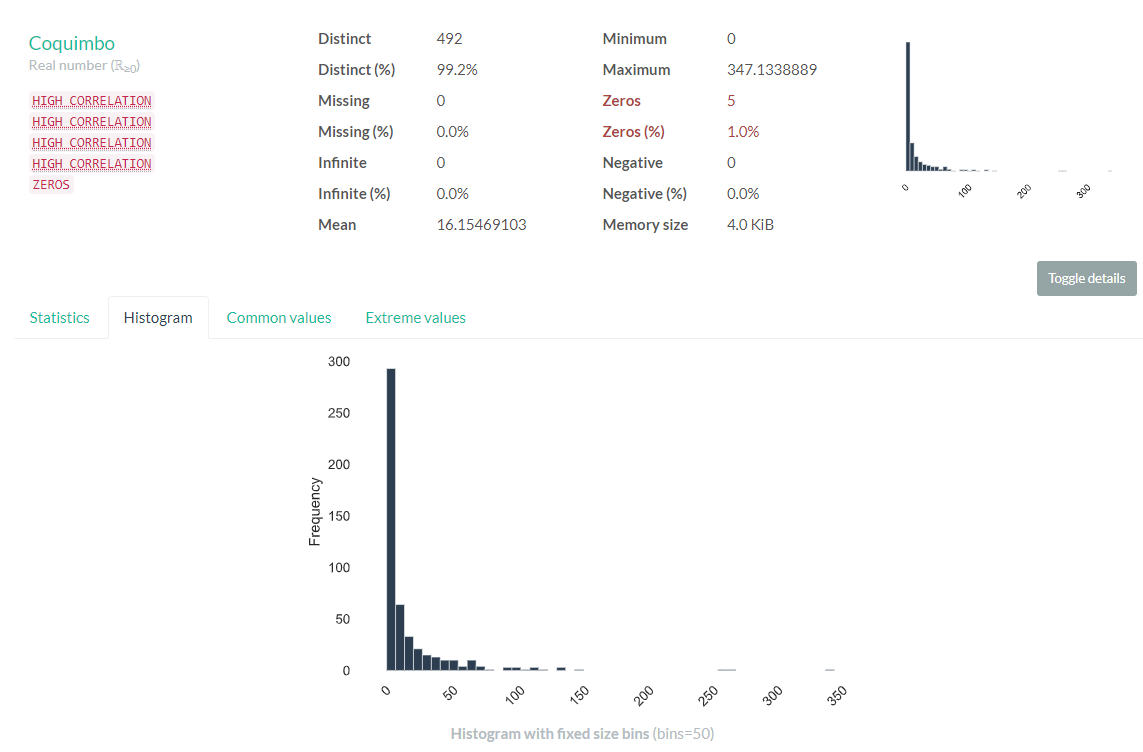

Vamos al detalle de las distribuciones -- > 

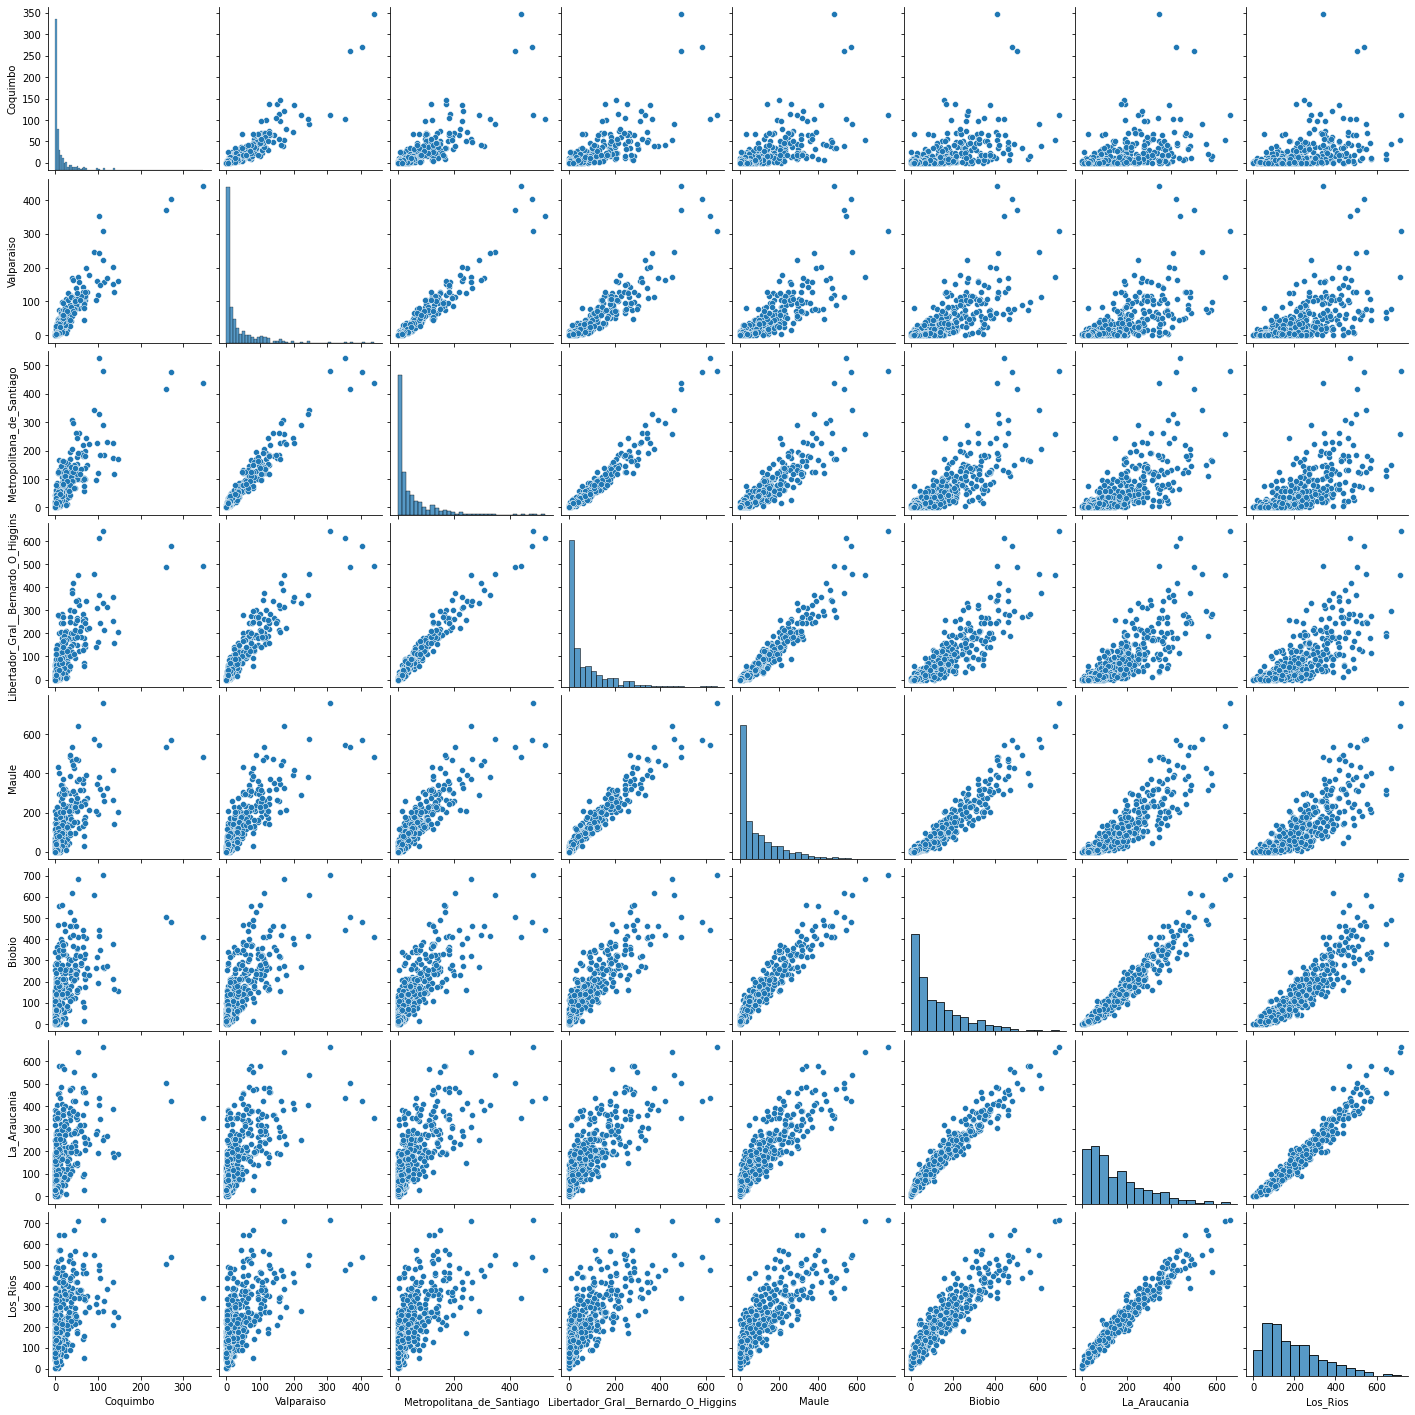

In [12]:
sns.pairplot(df_pr)

A simple vista se nota bastante correlación lineal a través de los pairplots visibles entre variables del dataset de precipitaciones y como se mencionaba anteriormente las distribuciones están sesgadas a la izquierda (guardar esta info para cuando se creen más variables, log fetures podrían hacer más normales las distribuciones).

La cantidad de registros de fechas es 496 los que contienen una cantidad de dias en el rango de 15066. Desde el 1 de Enero de 1979 hasta el 1 de abril de 2020. Los datos pertencen a las precipitaciones mensuales por región. Hay un registro para todos los días 1 del mes.



No tengo valores faltantes duplicados para estas fechas

In [13]:
df_pr.drop_duplicates(subset=["date"], inplace=True)

In [14]:
df_pr.shape

(496, 9)

### Data Banco Central

In [15]:
df_bank = pd.read_csv(path_bc)

De los análisis exploratorios que se hicieron con pandas-profiling su pudieron encontrar fallas en el tipo de dato que contine valores númericos y además la presencia de caracteres "a" dentro de los datos, por lo que hay que tratar los datos para dejarlos procesables para etapas futuras además se eliminar una fila con mala formatación de fecha

In [16]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 85 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Periodo                                                                             614 non-null    object 
 1   Imacec_empalmado                                                                    300 non-null    object 
 2   Imacec_produccion_de_bienes                                                         300 non-null    object 
 3   Imacec_minero                                                                       300 non-null    object 
 4   Imacec_industria                                                                    301 non-null    object 
 5   Imacec_resto_de_bienes                                                              300 non-null   

In [17]:
# pasar fechas a timestamps
date_format = "%Y-%m-%d"
df_bank = df_bank[df_bank["Periodo"] != "2020-13-01 00:00:00 UTC"]
df_bank["Periodo"] = df_bank["Periodo"].apply(lambda x: datetime.strptime(str(x[0:10]), date_format))

In [18]:
df_bank.sort_values(by=["Periodo"], ascending=True, inplace=True)
df_bank.reset_index(drop=True, inplace=True)
list(df_bank.columns)

['Periodo',
 'Imacec_empalmado',
 'Imacec_produccion_de_bienes',
 'Imacec_minero',
 'Imacec_industria',
 'Imacec_resto_de_bienes',
 'Imacec_comercio',
 'Imacec_servicios',
 'Imacec_a_costo_de_factores',
 'Imacec_no_minero',
 'PIB_Agropecuario_silvicola',
 'PIB_Pesca',
 'PIB_Mineria',
 'PIB_Mineria_del_cobre',
 'PIB_Otras_actividades_mineras',
 'PIB_Industria_Manufacturera',
 'PIB_Alimentos',
 'PIB_Bebidas_y_tabaco',
 'PIB_Textil',
 'PIB_Maderas_y_muebles',
 'PIB_Celulosa',
 'PIB_Refinacion_de_petroleo',
 'PIB_Quimica',
 'PIB_Minerales_no_metalicos_y_metalica_basica',
 'PIB_Productos_metalicos',
 'PIB_Electricidad',
 'PIB_Construccion',
 'PIB_Comercio',
 'PIB_Restaurantes_y_hoteles',
 'PIB_Transporte',
 'PIB_Comunicaciones',
 'PIB_Servicios_financieros',
 'PIB_Servicios_empresariales',
 'PIB_Servicios_de_vivienda',
 'PIB_Servicios_personales',
 'PIB_Administracion_publica',
 'PIB_a_costo_de_factores',
 'Impuesto_al_valor_agregado',
 'Derechos_de_Importacion',
 'PIB',
 'Precio_de_la_gaso


Las columnas disponibles tienen una notación especifica, para hacer este proceso de limpieza, buscaré ordenes de magnitud de las distintas variables a continuación, con el fin de determinar el factor divisor de cada una de las columnas (considerando un equiespaciado de puntos de largo 3)


Imacec el Índice Mensual de Actividad Económica (Imacec) es una estimación que resume la actividad de los distintos sectores de la economía en un determinado mes, a precios del año anterior; su variación interanual constituye una aproximación de la evolución del PIB. -- > orden de magnitud de **10^2**

PIB: Producto interno bruto

IVA: Impuesto ventas y servicios

Derechos de importación 

Precio de materias primas

Tasa de ocupación en diferentes sectores

TCM: El tipo de cambio multilateral (TCM) mide el valor nominal del peso chileno con respecto a una 
canasta amplia de monedas extranjeras.

TCR: El tipo de cambio real de una divisa respecto a otra es el poder de compra de una divisa tras su conversión

Indice de producción industrial

Generación de energía eléctricas

IVC

Venta autos nuevos

Precio dolar observado


Para hacer el análisis del dataset, se hara un agrupamiento. Pero, de una inspección visual, se desprende que hay valores no númericos ingresado al dataset. EN especifico, valores 'a'

A simple vista la presencia de valores faltantes puede ser notoria, ocuparé dos funciones que habitualmente ocupo para localizar puntos vacíos en los dataframes y estar seguro que estoy identificando todos los nans

In [19]:
# correr stack de limpieza previa para asegurar buena formatación de los datos
# en el caso de que hayan vacios en los comienzos de columnas categoricas
df_bank = drop_spaces_data(df_bank)

Can only use .str accessor with string values!
Can only use .str accessor with string values!
Can only use .str accessor with string values!
Can only use .str accessor with string values!
Can only use .str accessor with string values!
Can only use .str accessor with string values!
Can only use .str accessor with string values!
Can only use .str accessor with string values!
Can only use .str accessor with string values!


In [20]:
# reemplaza vacios con nans, para identificar vacios en el dataframe
df_bank = replace_empty_nans(df_bank)

Reemplazando 'a': Periodo ...
Reemplazando 'a': Imacec_empalmado ...
Reemplazando 'a': Imacec_produccion_de_bienes ...
Reemplazando 'a': Imacec_minero ...
Reemplazando 'a': Imacec_industria ...
Reemplazando 'a': Imacec_resto_de_bienes ...
Reemplazando 'a': Imacec_comercio ...
Reemplazando 'a': Imacec_servicios ...
Reemplazando 'a': Imacec_a_costo_de_factores ...
Reemplazando 'a': Imacec_no_minero ...
Reemplazando 'a': PIB_Agropecuario_silvicola ...
Reemplazando 'a': PIB_Pesca ...
Reemplazando 'a': PIB_Mineria ...
Reemplazando 'a': PIB_Mineria_del_cobre ...
Reemplazando 'a': PIB_Otras_actividades_mineras ...
Reemplazando 'a': PIB_Industria_Manufacturera ...
Reemplazando 'a': PIB_Alimentos ...
Reemplazando 'a': PIB_Bebidas_y_tabaco ...
Reemplazando 'a': PIB_Textil ...
Reemplazando 'a': PIB_Maderas_y_muebles ...
Reemplazando 'a': PIB_Celulosa ...
Reemplazando 'a': PIB_Refinacion_de_petroleo ...
Reemplazando 'a': PIB_Quimica ...
Reemplazando 'a': PIB_Minerales_no_metalicos_y_metalica_basic

La función siguiente hará un tratamiento en particular a las diferentes columnas con tal de limpiar sus valores

In [21]:
df_bank = values_treatement(df_bank)

Procesando columna IMACEC: Imacec_empalmado
Procesando columna IMACEC: Imacec_produccion_de_bienes
Procesando columna IMACEC: Imacec_minero
Procesando columna IMACEC: Imacec_industria
Procesando columna IMACEC: Imacec_resto_de_bienes
Procesando columna IMACEC: Imacec_comercio
Procesando columna IMACEC: Imacec_servicios
Procesando columna IMACEC: Imacec_a_costo_de_factores
Procesando columna IMACEC: Imacec_no_minero
Procesando una columna de PIB: PIB_Agropecuario_silvicola
Procesando una columna de PIB: PIB_Pesca
Procesando una columna de PIB: PIB_Mineria
Procesando una columna de PIB: PIB_Mineria_del_cobre
Procesando una columna de PIB: PIB_Otras_actividades_mineras
Procesando una columna de PIB: PIB_Industria_Manufacturera
Procesando una columna de PIB: PIB_Alimentos
Procesando una columna de PIB: PIB_Bebidas_y_tabaco
Procesando una columna de PIB: PIB_Textil
Procesando una columna de PIB: PIB_Maderas_y_muebles
Procesando una columna de PIB: PIB_Celulosa
Procesando una columna de PIB:

In [22]:
df_bank.describe()

Imacec_empalmado  Imacec_produccion_de_bienes  Imacec_minero  \
count        300.000000                   300.000000     300.000000   
mean          81.103284                    87.746925      93.574720   
std           21.343254                    13.770656      10.350706   
min           45.351890                    57.289238      58.149345   
25%           60.179462                    76.799340      88.418635   
50%           80.504395                    87.990501      95.434070   
75%          101.236814                    98.544681     100.744471   
max          122.347724                   123.733918     113.633912   

       Imacec_industria  Imacec_resto_de_bienes  Imacec_comercio  \
count        300.000000              300.000000       300.000000   
mean          86.884001               82.093990        72.484298   
std           13.282104               22.015894        28.661866   
min           58.367705               44.074997        32.452114   
25%           74.803297               64.270108        44.920739   
50%           88.093693               80.135665        65.986905   
75%           98.052931               96.656350        98.319765   
max          112.460585              141.504351       137.234509   

       Imacec_servicios  Imacec_a_costo_de_factores  Imacec_no_minero  \
count        300.000000                  300.000000        300.000000   
mean          78.962972                   81.764899         79.269516   
std           25.228556                   20.743042         23.203979   
min           35.480010                   46.265293         42.156776   
25%           54.880204                   61.764654         56.069606   
50%           79.389142                   81.466584         78.517510   
75%          102.180416                  100.867270        100.738509   
max          123.902119                  120.908088        123.293139   

       PIB_Agropecuario_silvicola  ...  \
count                   95.000000  ...   
mean                   350.581181  ...   
std                    174.420130  ...   
min                    149.713225  ...   
25%                    199.426653  ...   
50%                    289.356890  ...   
75%                    485.185229  ...   
max                    704.614473  ...   

       Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100  \
count                                         420.000000       
mean                                          141.952954       
std                                           170.880637       
min                                            80.217112       
25%                                            91.396894       
50%                                            95.628465       
75%                                           102.460619       
max                                           796.748521       

       Indice_de_produccion_industrial  \
count                       144.000000   
mean                        102.384933   
std                          58.522172   
min                          81.474191   
25%                          93.907717   
50%                          98.177743   
75%                         101.577322   
max                         796.396317   

       Indice_de_produccion_industrial__mineria  \
count                                372.000000   
mean                                 283.440088   
std                                  250.172466   
min                                   80.028979   
25%                                   92.600966   
50%                                  101.430061   
75%                                  443.354411   
max                                  798.944316   

       Indice_de_produccion_industrial_electricidad__gas_y_agua  \
count                                          84.000000          
mean                                          105.190884          
std                                             4.397180          
min                              

La idea es la siguiente que los datos se escapen entre los cuartiles 1 y 3

In [23]:
nans = pd.DataFrame(df_bank.isna().sum(), columns=["missing"])
nans.reset_index(drop=False, inplace=True)
nans.rename(columns={"index": "columna"}, inplace=True)
nans["porcentaje_nans"] = nans["missing"] / len(df_bank) * 100

In [24]:
nans

columna  missing  porcentaje_nans
0                                           Periodo        0         0.000000
1                                  Imacec_empalmado      313        51.060359
2                       Imacec_produccion_de_bienes      313        51.060359
3                                     Imacec_minero      313        51.060359
4                                  Imacec_industria      313        51.060359
..                                              ...      ...              ...
80         Generacion_de_energia_electrica_CDEC_GWh      349        56.933116
81              Indice_de_ventas_comercio_real_IVCM      529        86.296900
82  Indice_de_ventas_comercio_real_no_durables_IVCM      529        86.296900
83     Indice_de_ventas_comercio_real_durables_IVCM      529        86.296900
84                              Ventas_autos_nuevos      468        76.345840

[85 rows x 3 columns]

In [25]:
threshold_nans = 40
# columnas con un porcentaje de nans superior al threshold_nans 
tm_nans = list(nans[nans["porcentaje_nans"] >= threshold_nans]["columna"])
print(tm_nans, len(tm_nans))

['Imacec_empalmado', 'Imacec_produccion_de_bienes', 'Imacec_minero', 'Imacec_industria', 'Imacec_resto_de_bienes', 'Imacec_comercio', 'Imacec_servicios', 'Imacec_a_costo_de_factores', 'Imacec_no_minero', 'PIB_Agropecuario_silvicola', 'PIB_Pesca', 'PIB_Mineria', 'PIB_Mineria_del_cobre', 'PIB_Otras_actividades_mineras', 'PIB_Industria_Manufacturera', 'PIB_Alimentos', 'PIB_Bebidas_y_tabaco', 'PIB_Textil', 'PIB_Maderas_y_muebles', 'PIB_Celulosa', 'PIB_Refinacion_de_petroleo', 'PIB_Quimica', 'PIB_Minerales_no_metalicos_y_metalica_basica', 'PIB_Productos_metalicos', 'PIB_Electricidad', 'PIB_Construccion', 'PIB_Comercio', 'PIB_Restaurantes_y_hoteles', 'PIB_Transporte', 'PIB_Comunicaciones', 'PIB_Servicios_financieros', 'PIB_Servicios_empresariales', 'PIB_Servicios_de_vivienda', 'PIB_Servicios_personales', 'PIB_Administracion_publica', 'PIB_a_costo_de_factores', 'Impuesto_al_valor_agregado', 'Derechos_de_Importacion', 'PIB', 'Precio_del_diesel_centavos_de_dolargalon', 'Precio_del_gas_natural_d

Me llama la atención del número de nans en el dataset, veamos como se distribuyen el porcentaje de nans en cada columna, voy a verificarlo a través de visualizaciones

<AxesSubplot:>

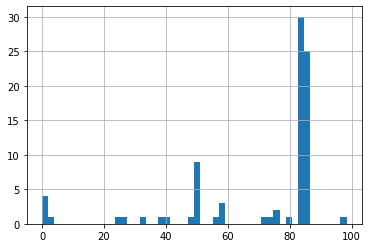

In [26]:
nans["porcentaje_nans"].hist(bins=50)

<AxesSubplot:>

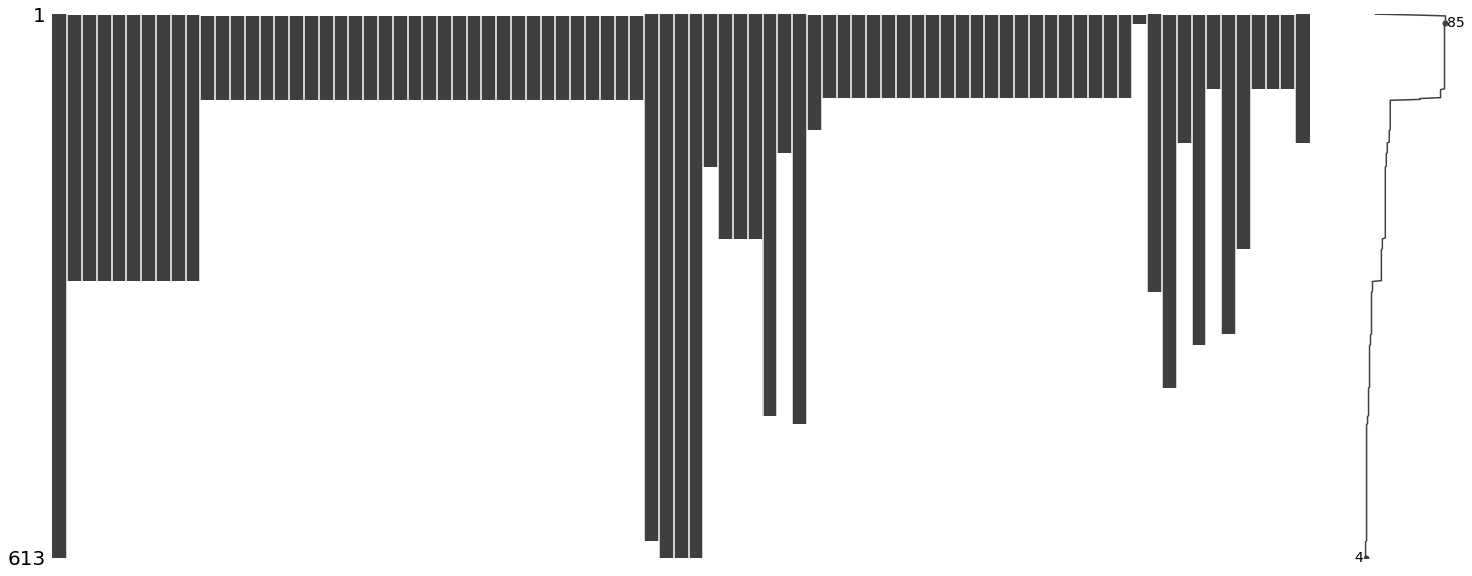

In [27]:
msno.matrix(df_bank)

<AxesSubplot:>

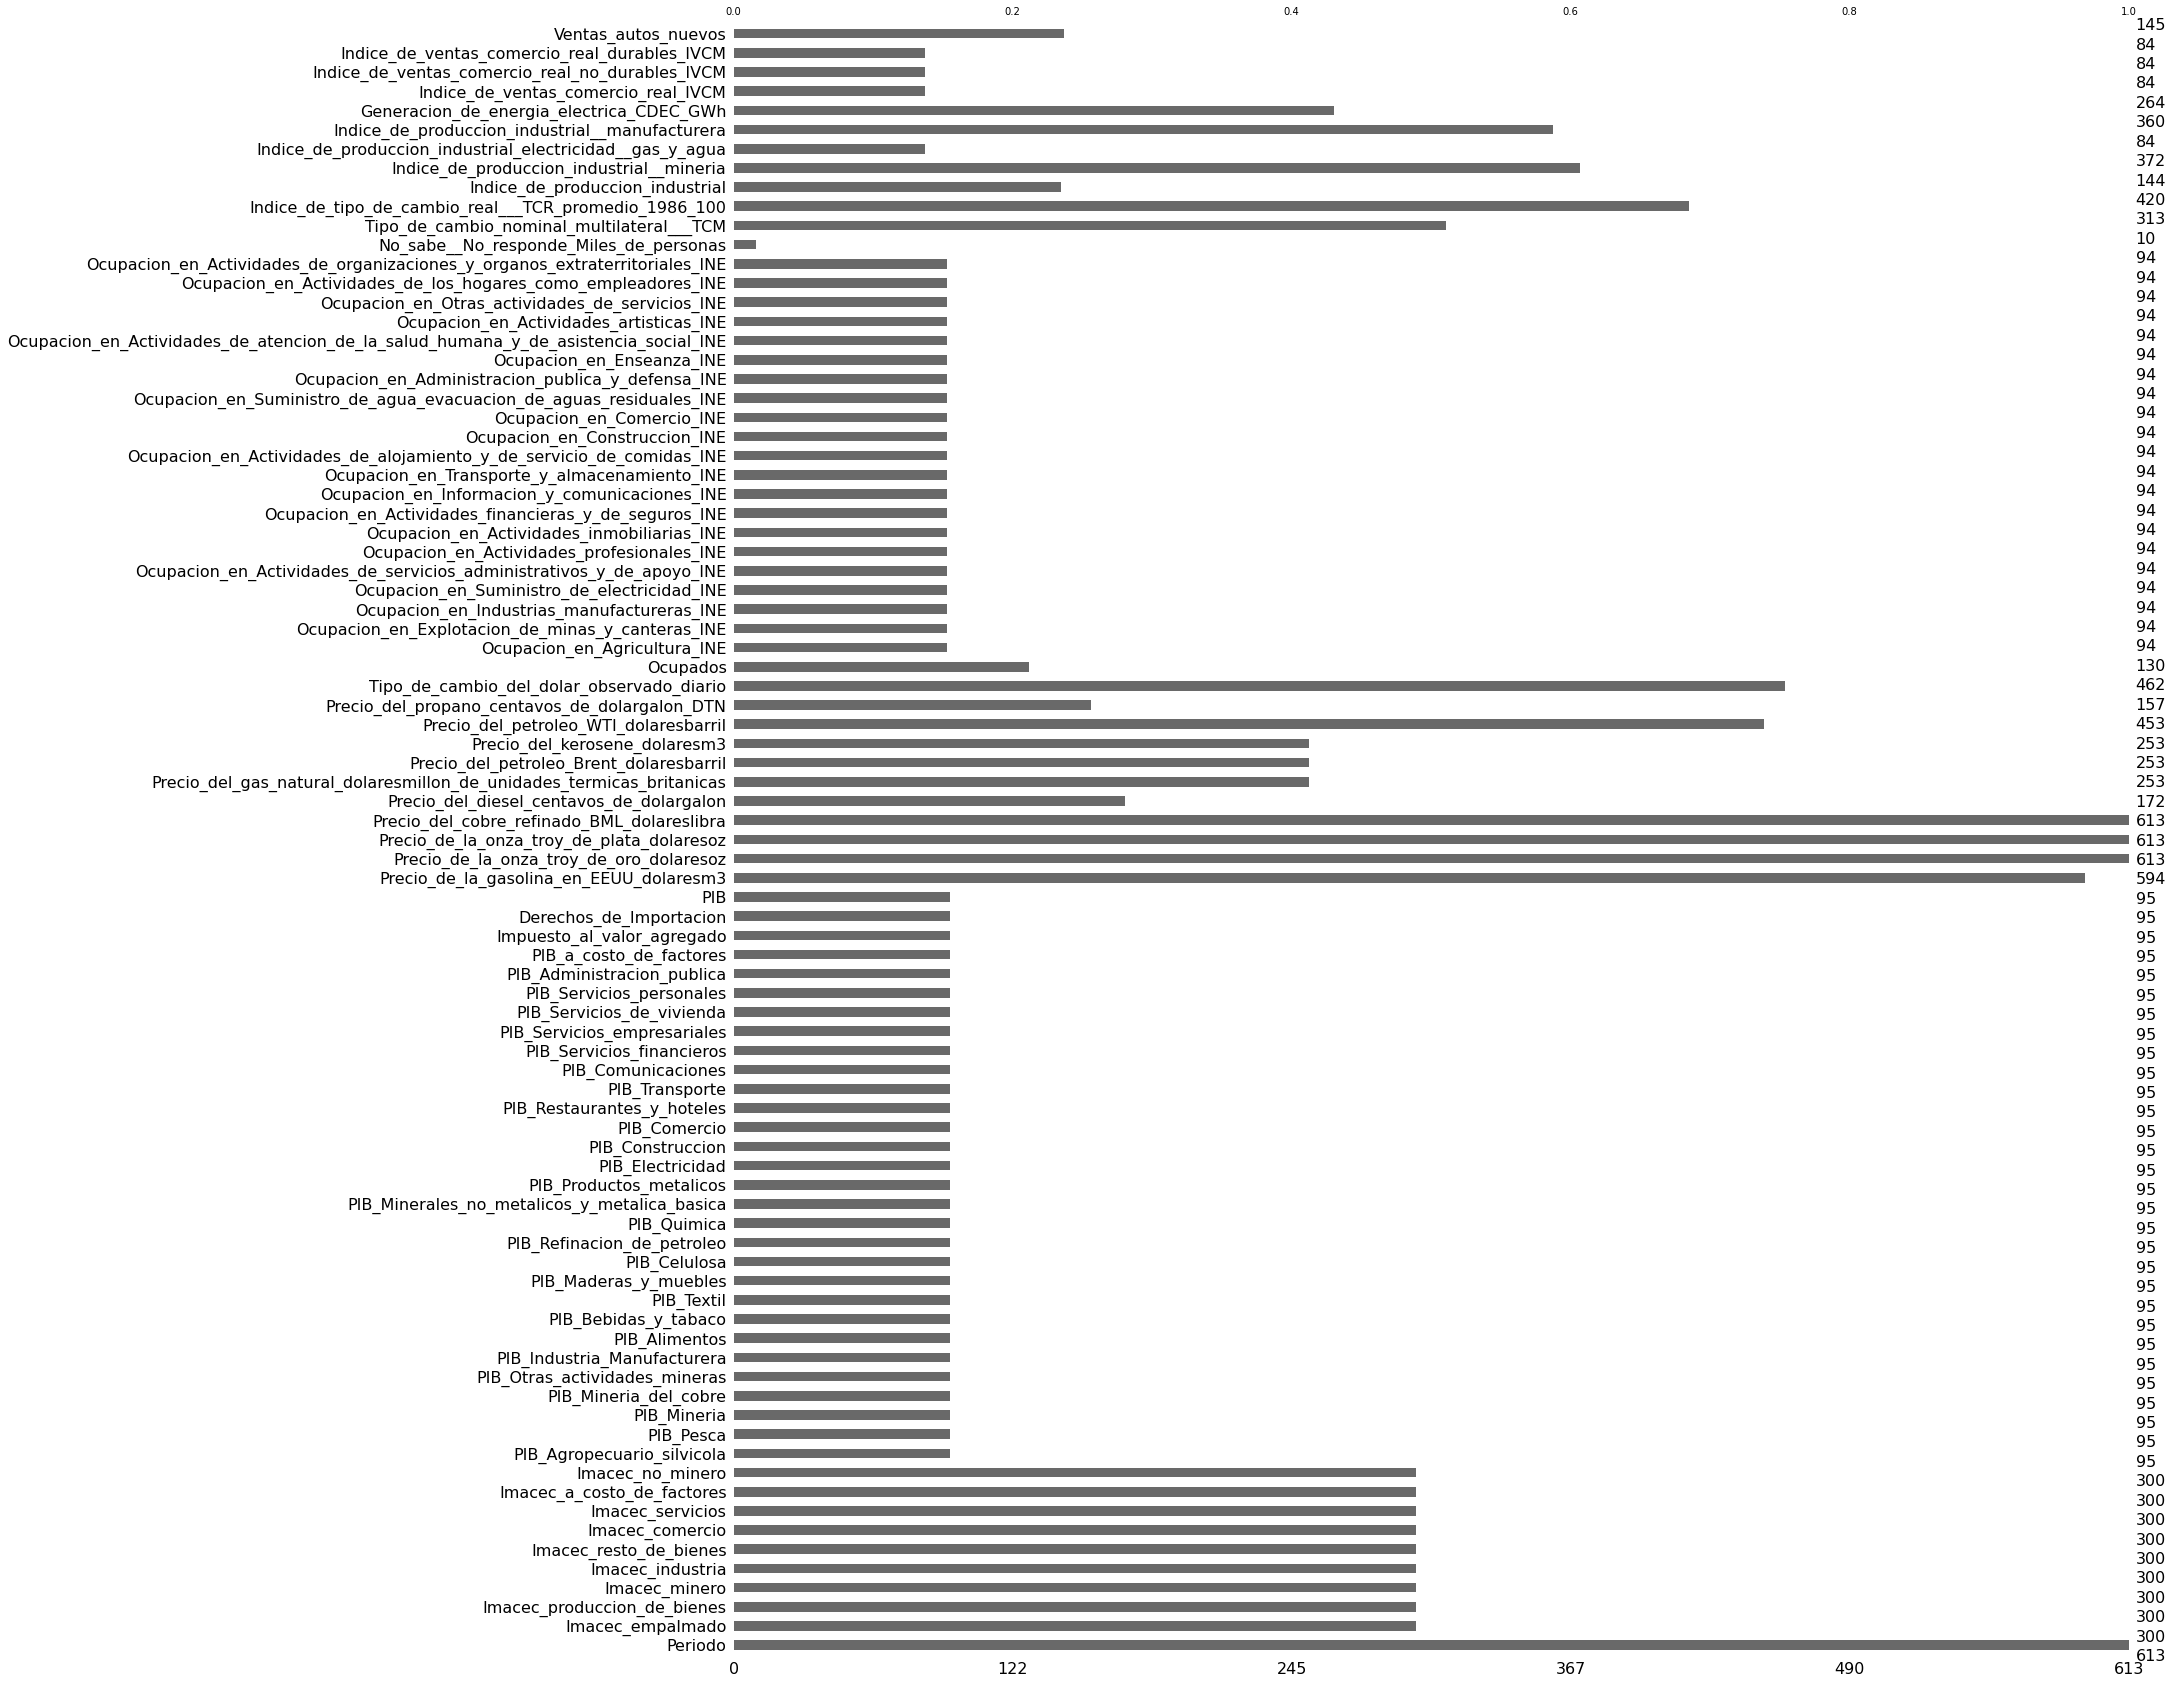

In [28]:
msno.bar(df_bank)

In [29]:
# Fechas comprendidas en los datos
print("Fecha inicial:", df_bank["Periodo"].min())
print("Fecha inicial:",df_bank["Periodo"].max())

Fecha inicial: 1970-01-01 00:00:00
Fecha inicial: 2020-11-01 00:00:00


In [30]:
df_bank.describe(include='all')

Periodo  Imacec_empalmado  Imacec_produccion_de_bienes  \
count                   613        300.000000                   300.000000   
unique                  611               NaN                          NaN   
top     2019-08-01 00:00:00               NaN                          NaN   
freq                      2               NaN                          NaN   
first   1970-01-01 00:00:00               NaN                          NaN   
last    2020-11-01 00:00:00               NaN                          NaN   
mean                    NaN         81.103284                    87.746925   
std                     NaN         21.343254                    13.770656   
min                     NaN         45.351890                    57.289238   
25%                     NaN         60.179462                    76.799340   
50%                     NaN         80.504395                    87.990501   
75%                     NaN        101.236814                    98.544681   
max                     NaN        122.347724                   123.733918   

        Imacec_minero  Imacec_industria  Imacec_resto_de_bienes  \
count      300.000000        300.000000              300.000000   
unique            NaN               NaN                     NaN   
top               NaN               NaN                     NaN   
freq              NaN               NaN                     NaN   
first             NaN               NaN                     NaN   
last              NaN               NaN                     NaN   
mean        93.574720         86.884001               82.093990   
std         10.350706         13.282104               22.015894   
min         58.149345         58.367705               44.074997   
25%         88.418635         74.803297               64.270108   
50%         95.434070         88.093693               80.135665   
75%        100.744471         98.052931               96.656350   
max        113.633912        112.460585              141.504351   

        Imacec_comercio  Imacec_servicios  Imacec_a_costo_de_factores  \
count        300.000000        300.000000                  300.000000   
unique              NaN               NaN                         NaN   
top                 NaN               NaN                         NaN   
freq                NaN               NaN                         NaN   
first               NaN               NaN                         NaN   
last                NaN               NaN                         NaN   
mean          72.484298         78.962972                   81.764899   
std           28.661866         25.228556                   20.743042   
min           32.452114         35.480010                   46.265293   
25%           44.920739         54.880204                   61.764654   
50%           65.986905         79.389142                   81.466584   
75%           98.319765        102.180416                  100.867270   
max          137.234509        123.902119                  120.908088   

        Imacec_no_minero  ...  \
count         300.000000  ...   
unique               NaN  ...   
top                  NaN  ...   
freq                 NaN  ...   
first                NaN  ...   
last                 NaN  ...   
mean           79.269516  ...   
std            23.203979  ...   
min            42.156776  ...   
25%            56.069606  ...   
50%            78.517510  ...   
75%           100.738509  ...   
max           123.293139  ...   

        Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100  \
count                                          420.000000       
unique                                                NaN       
top                                                   NaN       
freq                                                  NaN       
first                                                 NaN       
last                                                  NaN       
mean                                           

In [31]:
df_bank.shape

(613, 85)

# 3. Visualizaciones

Hago la función de visualziación en el modulo de visualizaciones que cree, a la función le agregué parámetros opcionales, para visualizar mejor las tendencias.


In [32]:
from src.vizualizations.historical_series import historical_time_series_plot

Hacer 

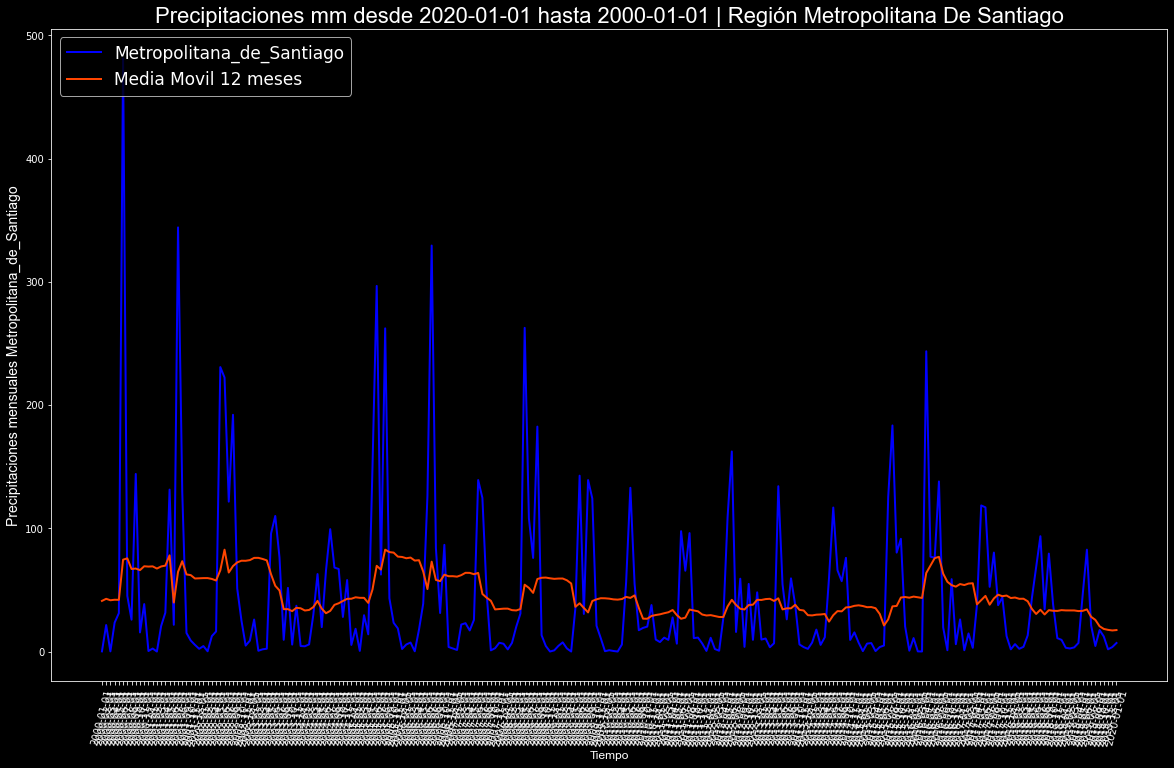

In [33]:
initial_date = '2000-01-01'
end_date = '2020-01-01'
region = 'Metropolitana_de_Santiago'
historical_time_series_plot(df_pr, region, initial_date, end_date, window_size=12)

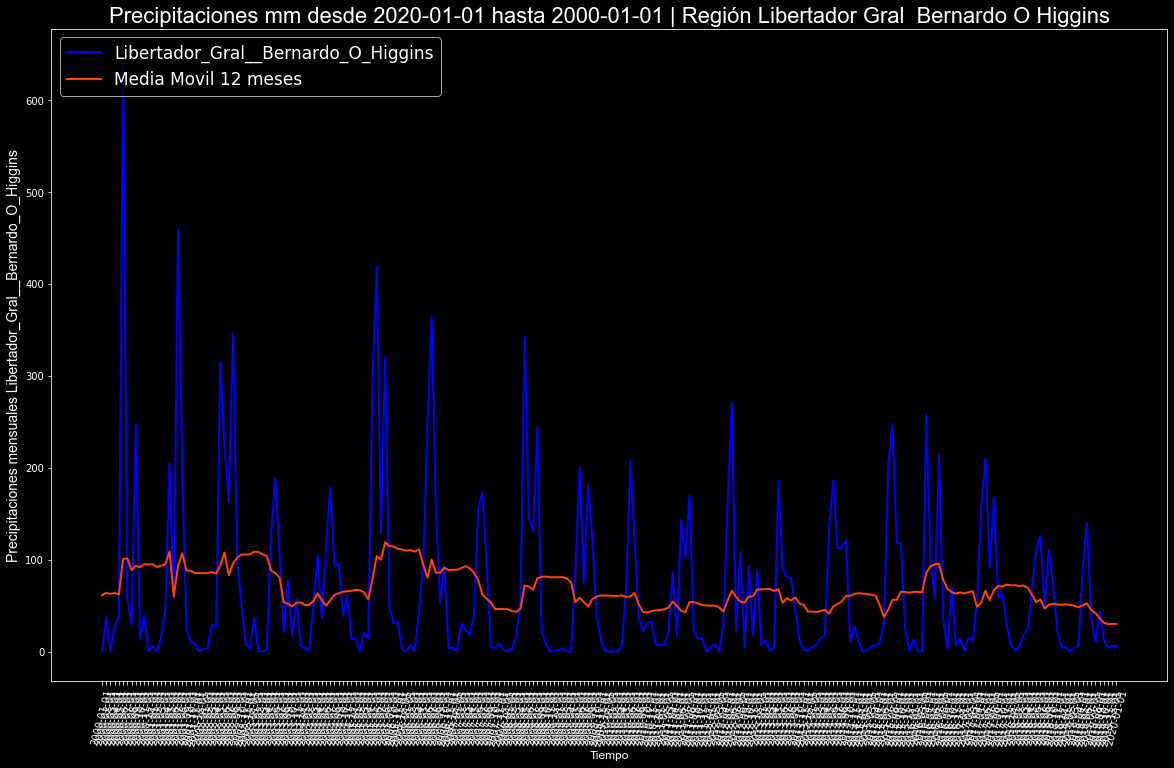

In [34]:
region = 'Libertador_Gral__Bernardo_O_Higgins'
historical_time_series_plot(df_pr, region, initial_date, end_date, window_size=12)

Se observan estacionalidades que coinciden con los ciclos de las estaciones en un año.
De la tendencia de las precipitaciones se observa claramente, que han disminuido las precipitaciones mensuales en los periodos de invierno, lo cual notamos al mirar la media movil anual.

Además las series de tiempo son visiblemente estacionarias las en ciclos anuales, de igual forma haré un test estadistico más adelante si hay tiempo para verificar de manera rápida
 

In [35]:
from src.preprocessing.stationarity import stationary_adf_test

In [36]:
cols = ['Metropolitana_de_Santiago', 'Libertador_Gral__Bernardo_O_Higgins']
stationarity_test = stationary_adf_test(df_pr, cols)

Para la columna:  Metropolitana_de_Santiago
Rechaza la hipótesis nula (H0), los datos son estacionarios
ADF estadisticas: -5.589755
Valor de p: 0.000001
Valores criticos:
	1%: -3.444
	5%: -2.868
	10%: -2.570
Para la columna:  Libertador_Gral__Bernardo_O_Higgins
Rechaza la hipótesis nula (H0), los datos son estacionarios
ADF estadisticas: -5.538912
Valor de p: 0.000002
Valores criticos:
	1%: -3.444
	5%: -2.868
	10%: -2.570


In [37]:
stationarity_test

columna  \
0            Metropolitana_de_Santiago   
1  Libertador_Gral__Bernardo_O_Higgins   

                                           resultado   valor_p  \
0  Rechaza la hipótesis nula (H0), los datos son ...  0.000001   
1  Rechaza la hipótesis nula (H0), los datos son ...  0.000002   

                                          intervalos  
0  [(1%, -3.4440471158221206), (5%, -2.8675801971...  
1  [(1%, -3.4440471158221206), (5%, -2.8675801971...

Ambas series de tiempo estacionarias  --> Ok

Usa esta función para graficar las precipitaciones para la Región del Maule durante
los años 1982, 1992, 2002, 2012 y 2019.
o ¿Qué puedes concluir de estos gráficos?

In [38]:
from src.vizualizations.historical_series import plot_anual_time_series

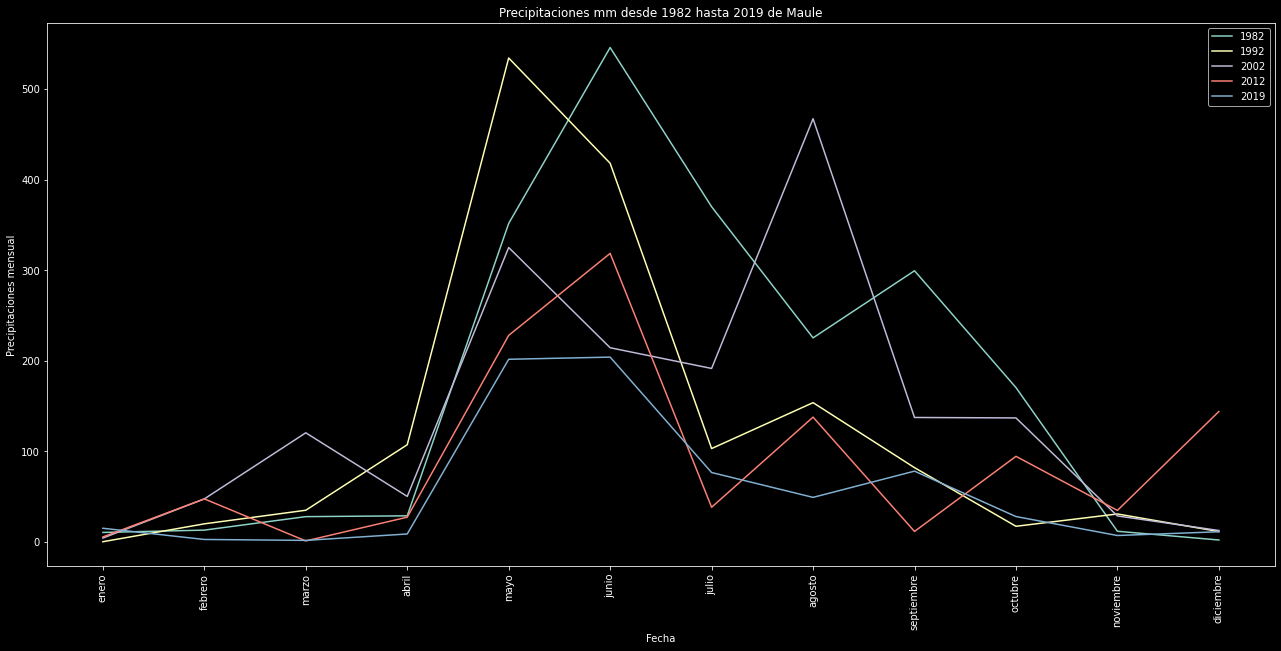

In [39]:
plot_anual_time_series(df_pr,['1982','1992','2002', '2012', '2019'], 'Maule')

De el gráfico se desprende que se desplazan las precipitaciones máximas a los largo de los años para los meses de de invierno (abril hasta septiembre -> temportada de lluvias). Manteniendose altos en los años 1982, 1992, y 2002. Pero luego, la máxima disminuye radicalmente en 2012. Donde caen las precipitaciones máximas y las precipitaciones en general. Finalmente en el año 2019, las precipitaciones son de las mas bajas. Por lo que se desprende claramente que a lo largo de los años han disminuido las precipitaciones, por ende han aumentando los períodos de sequia.

#### Crea una función que permita visualizar dos series históricas de PIB para un rango de
fechas determinado. Para esto la función debe recibir como input el nombre de cada
serie, fecha de inicio y fecha de término

In [40]:
df_bank = df_bank.reset_index(drop=True)
# periodo string formato mes-año
df_bank['string_fechas'] = df_bank['Periodo'].apply(lambda x: str(x.month)+'-'+str(x.year))

In [41]:
# creo la función en el modulo
from src.vizualizations.historical_series import pib_time_series_plot

#### Grafica las series de tiempo del PIB agropecuario y silvícola y la del PIB de Servicios
financieros desde el 2013-01-01 hasta la fecha más reciente en que haya datos.
o ¿Qué puedes decir de cada serie en particular?
o ¿Hay alguna relación entre estas dos series?

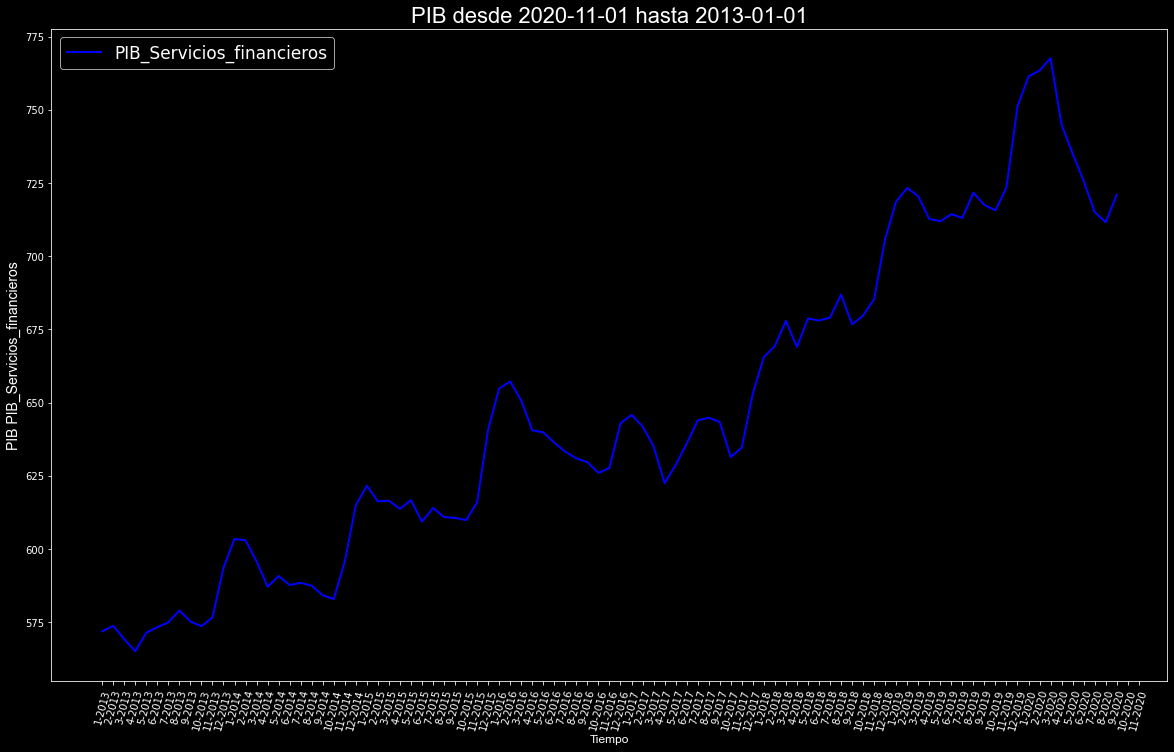

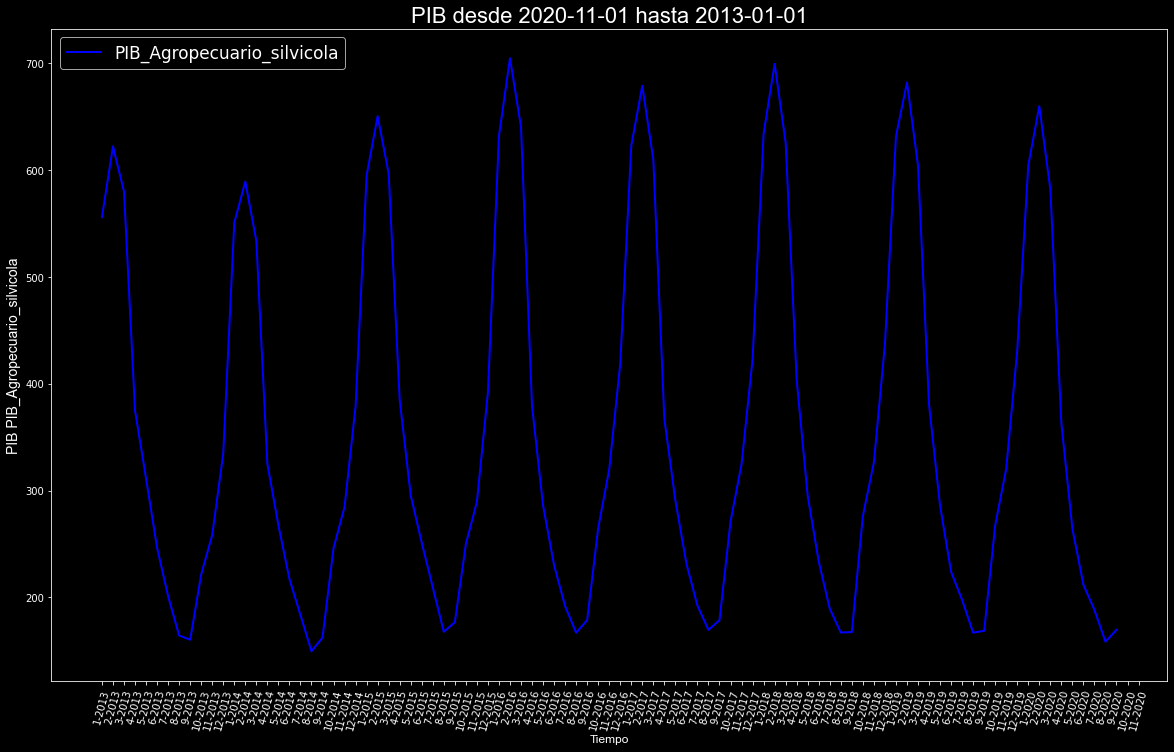

In [42]:
pib_columns = ['PIB_Servicios_financieros','PIB_Agropecuario_silvicola']
initial_date = '2013-01-01'
end_date = df_bank['Periodo'].max().strftime('%Y-%m-%d')
for col in pib_columns:
    pib_time_series_plot(df_bank, col, initial_date, end_date)

En la serie de tiempo PIB Servicios financieros se observa estacionalidad y tendencia desde 2013. La estacioanlidad tiene periodos de un año, donde en noviembre-diciembre comienza aumentar el valor del PIB de servicio financieros hasta abril del siguiente año, donde las variaciones comienza a ser menores.

La serie de tiempo PIB agropecuario silviola muestra estacionalidad de 12 meses. Donde en Enero se encuentran los PIBs mas alto (250 aprox), disminuyendo hasta Septiembre (200 aprox) y luego aumentando el valor del PIB hasta ENero del siguiente año, estacionaria sin lugar a dudas.

Ambas serie se relacionan en que los peaks de los periodos se alcanzan en el mes de Enero y luego comienzan a disminuir relativamente hasta Septiembre. Por lo que su estacionalidad esta relacionada.

# 4. Tratamiento y creación de variables

Analizar las correlaciones de los distitos modulos datasets

Para evaluar la correlación entre las distintas series de tiempo se puede comenzar con un método simple, que es la correlación de Pearson, que mide la correlación lineal entre 2 variables (con un valor de -1 a 1,donde los extremos indican correlación negativa y positiva, respectivamente.). Pero, en las series de tiempo existe una componente temporal, por lo que para hacer una análisis de correlación, se debe analizar la autocorrelación y además, la correlación cruzada con las otras series de tiempo. Para esto se necesitan estadisticas más complejas, como el test de causalidad de Granger.

La idea general es que variables muy correlacionadas, entregan información similiar o redundante, por lo que no "aportarían" a la capacidad predictiva del modelo de predicción. Además, para algunos modelos, como los modelos lineales, la colinealiad de muchas caraterísticas puede resultar en soluciones numericamente inestables. En otros modelos puede ayudar a mejorar o emporar ligeramente, como por ejemplo, en redes neuronales. No hay una respuesta clara, pero el análisis depende del número de caracteristicas y además de la magnitud de la colinealidad.

Para aminorar este tipo de problemas, se recomienda utilizar métodos ensamblados.

In [43]:
# podemos usar esta función o hacerlo a mano, no es tan más tedioso
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm as cm
from src.vizualizations.correlation import correlation_matrix
plt.style.use('dark_background')

In [44]:
df = df_bank.copy()
df.drop(columns=["Periodo", "string_fechas"], inplace=True)
method = "pearson"

Text(0.5, 1.0, 'Matriz de correlación, método: pearson')

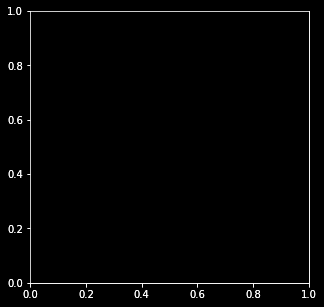

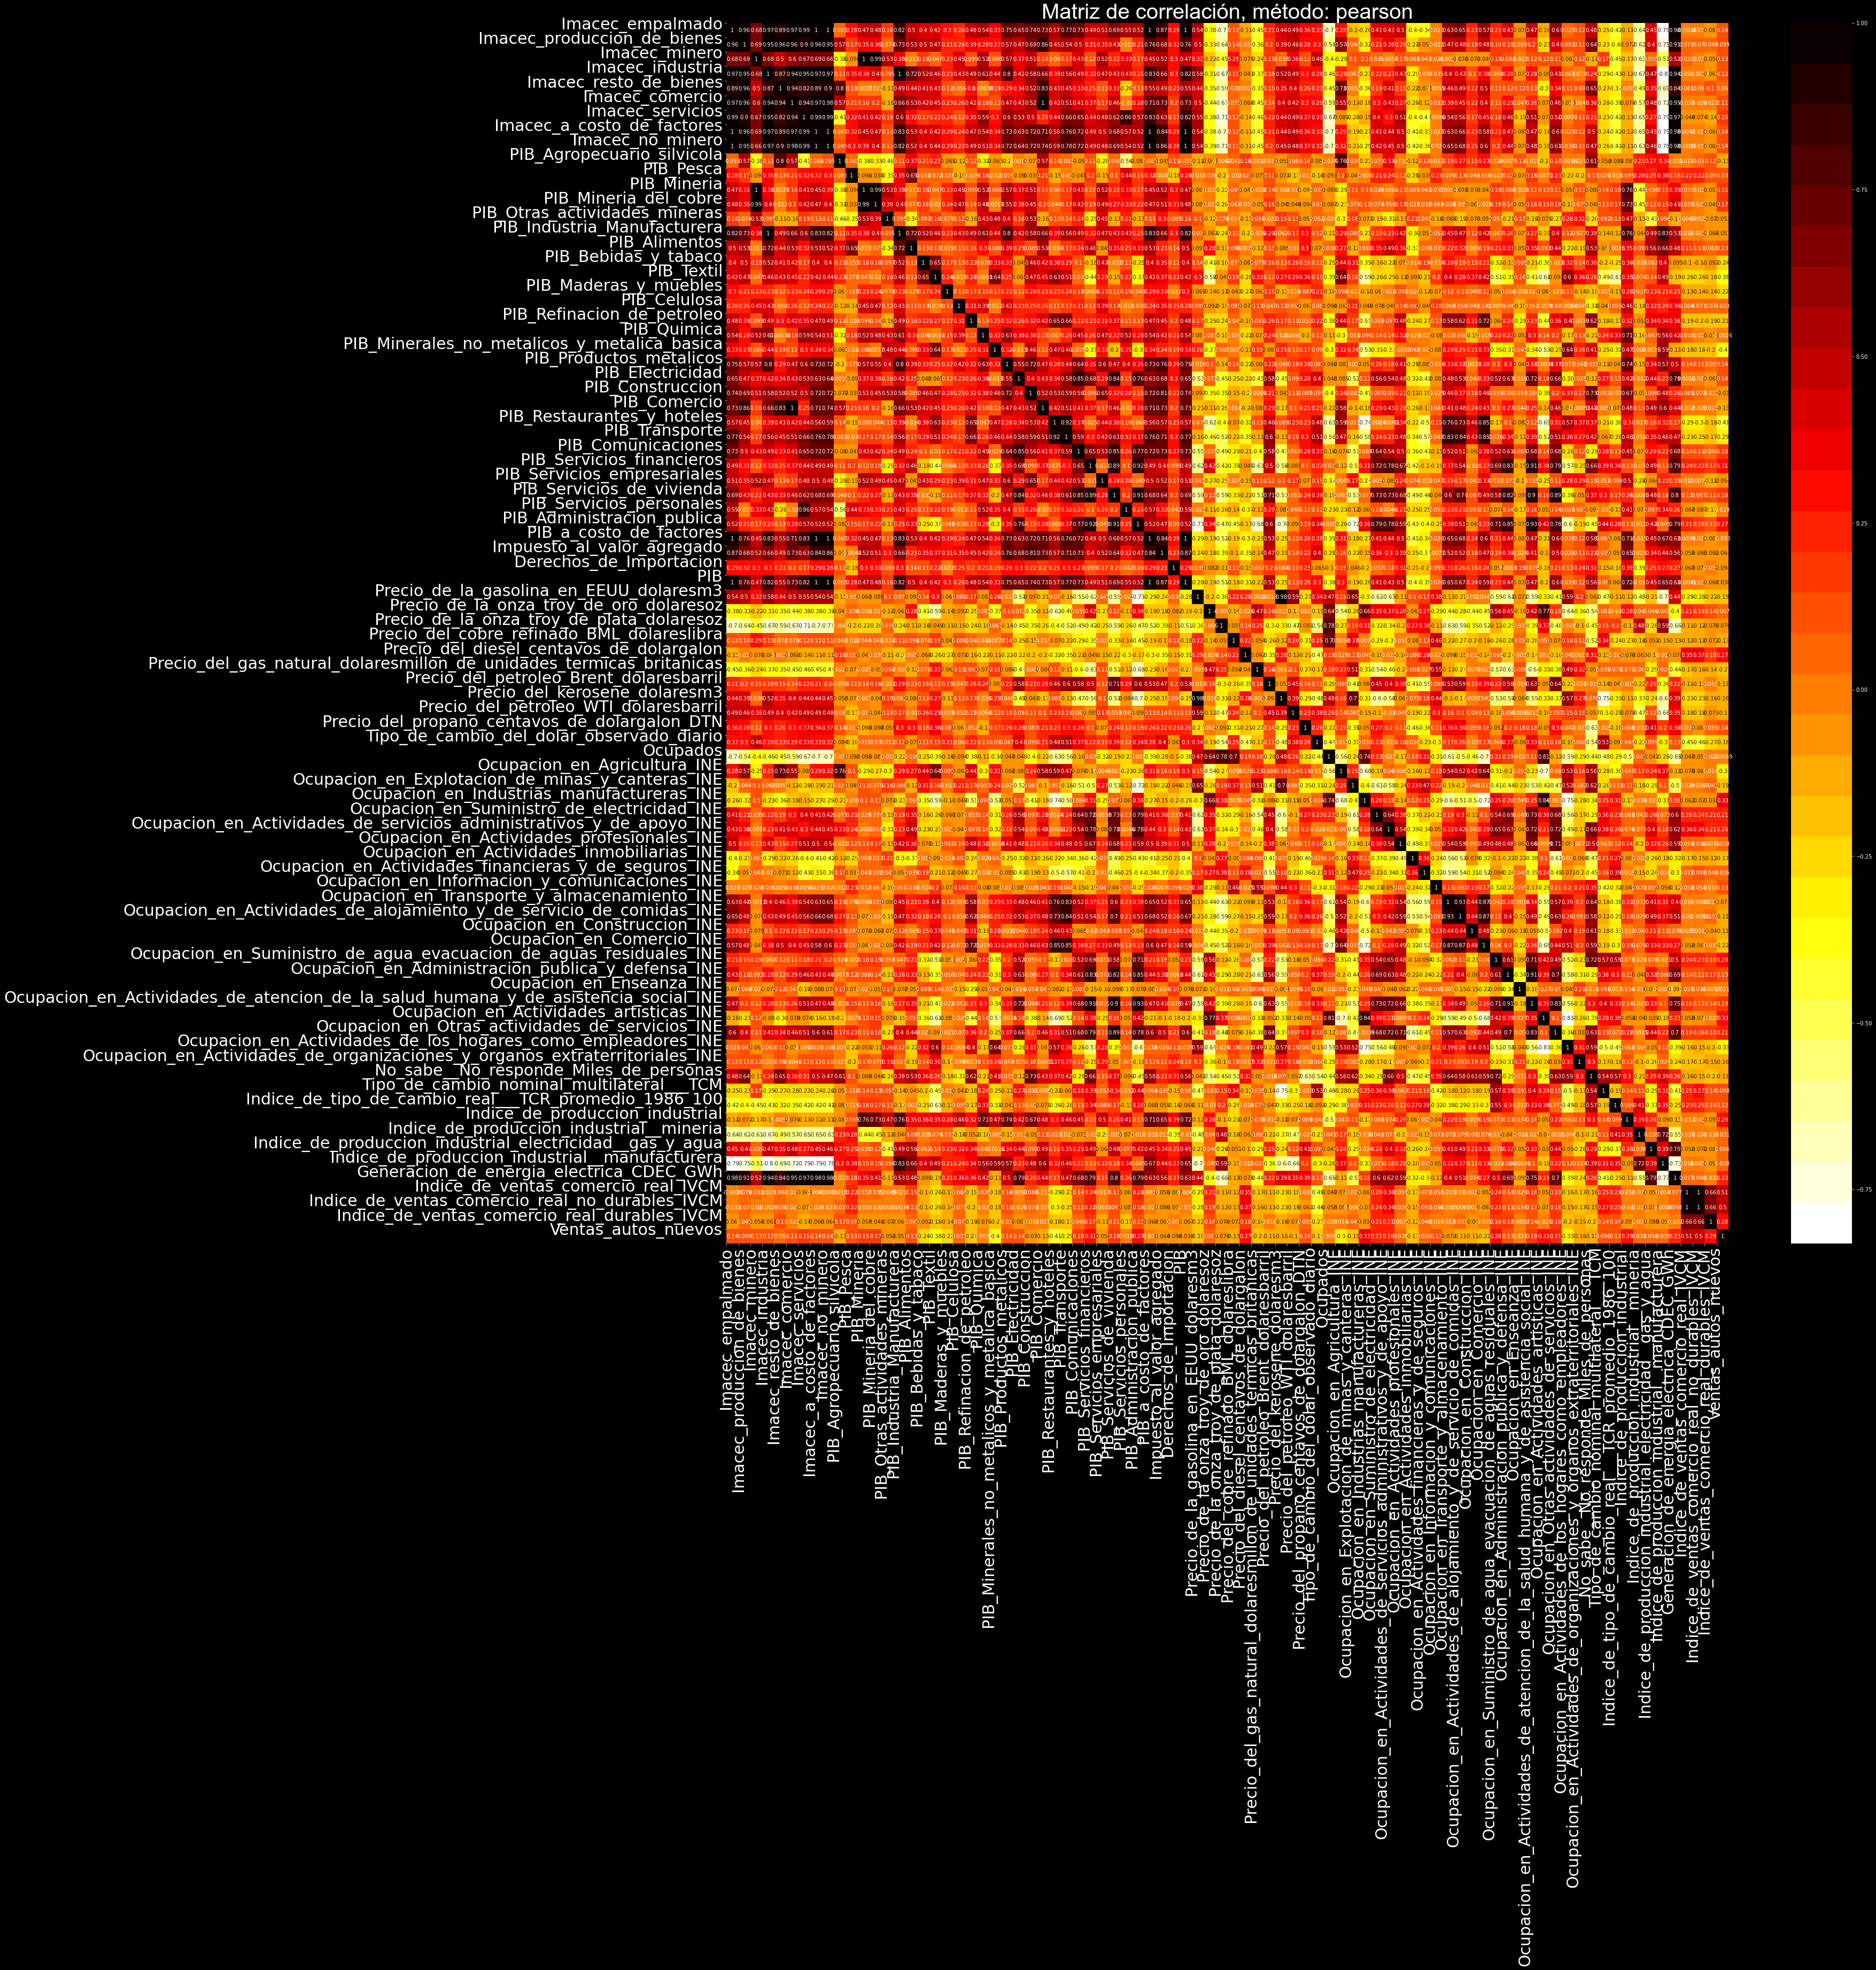

In [45]:
letter_size = 30
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
cmap = cm.get_cmap('hot_r', 30)
ax = fig.add_subplot(111)
size = int(len(list(df.columns))/2)
corr = df.corr(method=method)
fig, ax = plt.subplots(figsize=(size, size))
# ax.matshow(corr, cmap=cmap)
sns.heatmap(corr, annot=True, cmap=cmap)
plt.xticks(range(len(corr.columns)), corr.columns, fontsize=letter_size)
plt.yticks(range(len(corr.columns)), corr.columns, fontsize=letter_size)
ax.set_xticklabels(df.columns, fontsize=letter_size)
ax.set_yticklabels(df.columns, fontsize=letter_size)
plt.xticks(rotation=90)
# plt.yticks(rotation=90)
ax.set_title(f"Matriz de correlación, método: {method}",
             fontname="Arial", fontsize=letter_size+10)

In [46]:
df = df_pr.copy()
df.drop(columns=["date"], inplace=True)
method = "pearson"

Text(0.5, 1.0, 'Matriz de correlación, método: pearson')

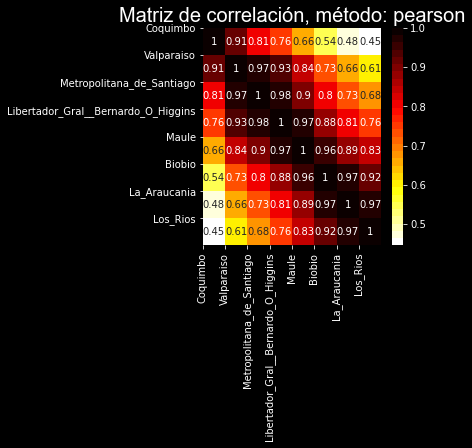

In [47]:
letter_size = 10
# fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
cmap = cm.get_cmap('hot_r', 30)
ax = fig.add_subplot(111)
size = int(len(list(df.columns))/2)
corr = df.corr(method=method)
fig, ax = plt.subplots(figsize=(size, size))
# ax.matshow(corr, cmap=cmap)
sns.heatmap(corr, annot=True, cmap=cmap)
plt.xticks(range(len(corr.columns)), corr.columns, fontsize=letter_size)
plt.yticks(range(len(corr.columns)), corr.columns, fontsize=letter_size)
ax.set_xticklabels(df.columns, fontsize=letter_size)
ax.set_yticklabels(df.columns, fontsize=letter_size)
plt.xticks(rotation=90)
# plt.yticks(rotation=90)
ax.set_title(f"Matriz de correlación, método: {method}",
             fontname="Arial", fontsize=letter_size+10)

In [48]:
df.columns

Index(['Coquimbo', 'Valparaiso', 'Metropolitana_de_Santiago',
       'Libertador_Gral__Bernardo_O_Higgins', 'Maule', 'Biobio',
       'La_Araucania', 'Los_Rios'],
      dtype='object')

#### Para el entrenamiento del modelo, queremos predecir el precio de la leche para el
productor en Chile. Para eso, descarga el archivo precio_leche.csv y haz un merge con
las bases de datos de precipitaciones y datos del Banco Central.

In [49]:
path_milk = "data/raw/precio_leche.csv"
df_milk = pd.read_csv(path_milk)

In [50]:
df_milk.rename(columns={"Anio": "year", "Mes": "month", "Precio_leche": "precio_leche"}, inplace=True)

In [51]:
df_milk.head(10)

year month  precio_leche
0  1979   Ene          3.85
1  1979   Feb          4.58
2  1979   Mar          5.18
3  1979   Abr          6.06
4  1979   May          7.25
5  1979   Jun          7.71
6  1979   Jul          8.10
7  1979   Ago          7.65
8  1979   Sep          6.96
9  1979   Oct          5.79

In [52]:
df_milk["month"].unique()

array(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep',
       'Oct', 'Nov', 'Dic'], dtype=object)

In [53]:
dict_ = {'Ene': 1, 'Feb': 2, 'Mar': 3, 'Abr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Ago': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dic': 12}

In [54]:
df_milk['date'] = df_milk.apply(lambda x: '01-' + str(dict_[x['month']]) + '-' + str(x['year']), axis=1)

In [55]:
# obtener datetime
df_milk['date'] = df_milk['date'].apply(lambda x: datetime.strptime(x, '%d-%m-%Y'))

In [56]:
df_milk['date']

0     1979-01-01
1     1979-02-01
2     1979-03-01
3     1979-04-01
4     1979-05-01
         ...    
501   2020-10-01
502   2020-11-01
503   2020-12-01
504   2021-01-01
505   2021-02-01
Name: date, Length: 506, dtype: datetime64[ns]

In [57]:
print('Mínima fecha leche', df_milk['date'].min())
print('Máxima fecha leche', df_milk['date'].max())

Mínima fecha leche 1979-01-01 00:00:00
Máxima fecha leche 2021-02-01 00:00:00


In [58]:
df_bank.rename(columns={'Periodo':'date'}, inplace=True)
# juntar los features
db = df_pr.merge(df_bank, how='outer',on=['date'])
# juntar los targets
db = db.merge(df_milk, how='outer', on=['date'])

In [59]:
db.shape

(616, 97)

In [60]:
db.head(20)

date   Coquimbo  Valparaiso  Metropolitana_de_Santiago  \
0  1979-01-01   2.641948    0.587062                   2.447114   
1  1979-02-01   1.179804    2.432192                   3.997852   
2  1979-03-01   0.255490    0.020601                   0.000000   
3  1979-04-01  10.173699   11.745779                  13.722349   
4  1979-05-01   1.039098   18.609286                  50.187148   
5  1979-06-01   0.141157    0.000000                   1.397164   
6  1979-07-01  34.630791  118.340422                 170.614262   
7  1979-08-01   9.073373   49.270309                 130.503624   
8  1979-09-01  12.041765   33.970292                  77.705101   
9  1979-10-01   0.018634    0.558101                  10.871275   
10 1979-11-01   0.152150    9.558961                  41.797987   
11 1979-12-01   1.071078   17.899757                  49.835101   
12 1980-01-01   4.799052    5.806867                   4.237081   
13 1980-02-01   9.995052   13.133620                  22.604933   
14 1980-03-01   0.352660    0.021055                   0.006208   
15 1980-04-01  96.718183  160.951802                 227.852013   
16 1980-05-01   8.103719   73.758507                 167.818255   
17 1980-06-01  21.944961   69.422841                 122.420755   
18 1980-07-01  73.975013  126.372484                 150.760352   
19 1980-08-01  13.563444   20.806331                  27.054480   

    Libertador_Gral__Bernardo_O_Higgins       Maule      Biobio  La_Araucania  \
0                              1.608992    3.736215   17.859634     25.212940   
1                              4.346310   16.347637   17.680612     18.085072   
2                              0.055488    0.545324   14.435698     28.696504   
3                             12.989194   21.880607   39.136483     43.617921   
4                            104.451550  143.914334  219.729235    279.409718   
5                              7.378558   28.797945   72.501902    113.488705   
6                            301.256558  482.199009  411.270877    356.070480   
7                            200.210387  294.567554  378.102706    458.753077   
8                            156.477457  161.299858  158.965598    203.191759   
9                             14.557008   11.238902   51.010499    121.420487   
10                            68.466822  105.529060  145.963956    164.355689   
11                            52.601721   84.612238  119.269920    132.509535   
12                             1.403891    0.248661    1.302261     13.765171   
13                            26.037023   64.154451  166.664082    202.816032   
14                             0.658264    9.521082   24.093065     56.539246   
15                           312.417582  343.409825  318.483724    290.288926   
16                           274.686838  399.957213  556.559461    576.974463   
17                           176.574744  322.564035  376.861130    331.213168   
18                           217.400217  272.503028  262.591104    254.096603   
19                            41.436310   80.076847  184.348025    269.600678   

      Los_Rios  Imacec_empalmado  ...  \
0    45.596447               NaN  ...   
1    34.075039               NaN  ...   
2    66.232248               NaN  ...   
3    73.548127               NaN  ...   
4   438.005116               NaN  ...   
5   179.949832               NaN  ...   
6   424.988334               NaN  ...   
7   645.763592               NaN  ...   
8   252.733618               NaN  ...   
9   177.008294               NaN  ...   
10  190.984354               NaN  ...   
11  200.633579               NaN  ...   
12   65.338475               NaN  ...   
13  229.069832               NaN  ...   
14  124.323902               NaN  ...   
15  347.281550               NaN  ...   
16  569.967635               NaN  ...   
17  354.877403               NaN  ...   
18  349.986266               NaN  ...   
19  356.585297               NaN  ...   

    Indice_de_produccion_industrial__

#### Crear nuevos features

Se empieza creando los features temporales 

In [61]:
db['year'] = db['date'].apply(lambda x: x.year)
db['month'] = db['date'].apply(lambda x: x.month)
db['trimestre'] = db['date'].apply(lambda x: int(x.month / 4) +1)

In [62]:
db['trimestre'].unique()

array([1, 2, 3, 4], dtype=int64)

In [63]:
df = db.copy()

In [64]:
df.drop(columns=["date", "string_fechas"], inplace=True)

Solo para verificar me gustaría saber si hay columnas que se correlacionen con el precio de la leche, para no eliminarlas de inmediato, si no que retenerlas lo más posible en la etapa de feature engineering

In [65]:
corr = pd.DataFrame(df.corr())
hypotesis = corr["precio_leche"]
hypotesis = pd.DataFrame(hypotesis)
hypotesis.reset_index(drop=False, inplace=True)
hypotesis["abs"] = hypotesis["precio_leche"].apply(abs)
important_cols = list(hypotesis[hypotesis["abs"] > 0.7]["index"])
important_cols

['Imacec_empalmado',
 'Imacec_produccion_de_bienes',
 'Imacec_industria',
 'Imacec_resto_de_bienes',
 'Imacec_comercio',
 'Imacec_servicios',
 'Imacec_a_costo_de_factores',
 'Imacec_no_minero',
 'Indice_de_produccion_industrial__manufacturera',
 'Generacion_de_energia_electrica_CDEC_GWh',
 'year',
 'precio_leche']

Llegados acá debemos tratar el problema de nans values, 

<AxesSubplot:>

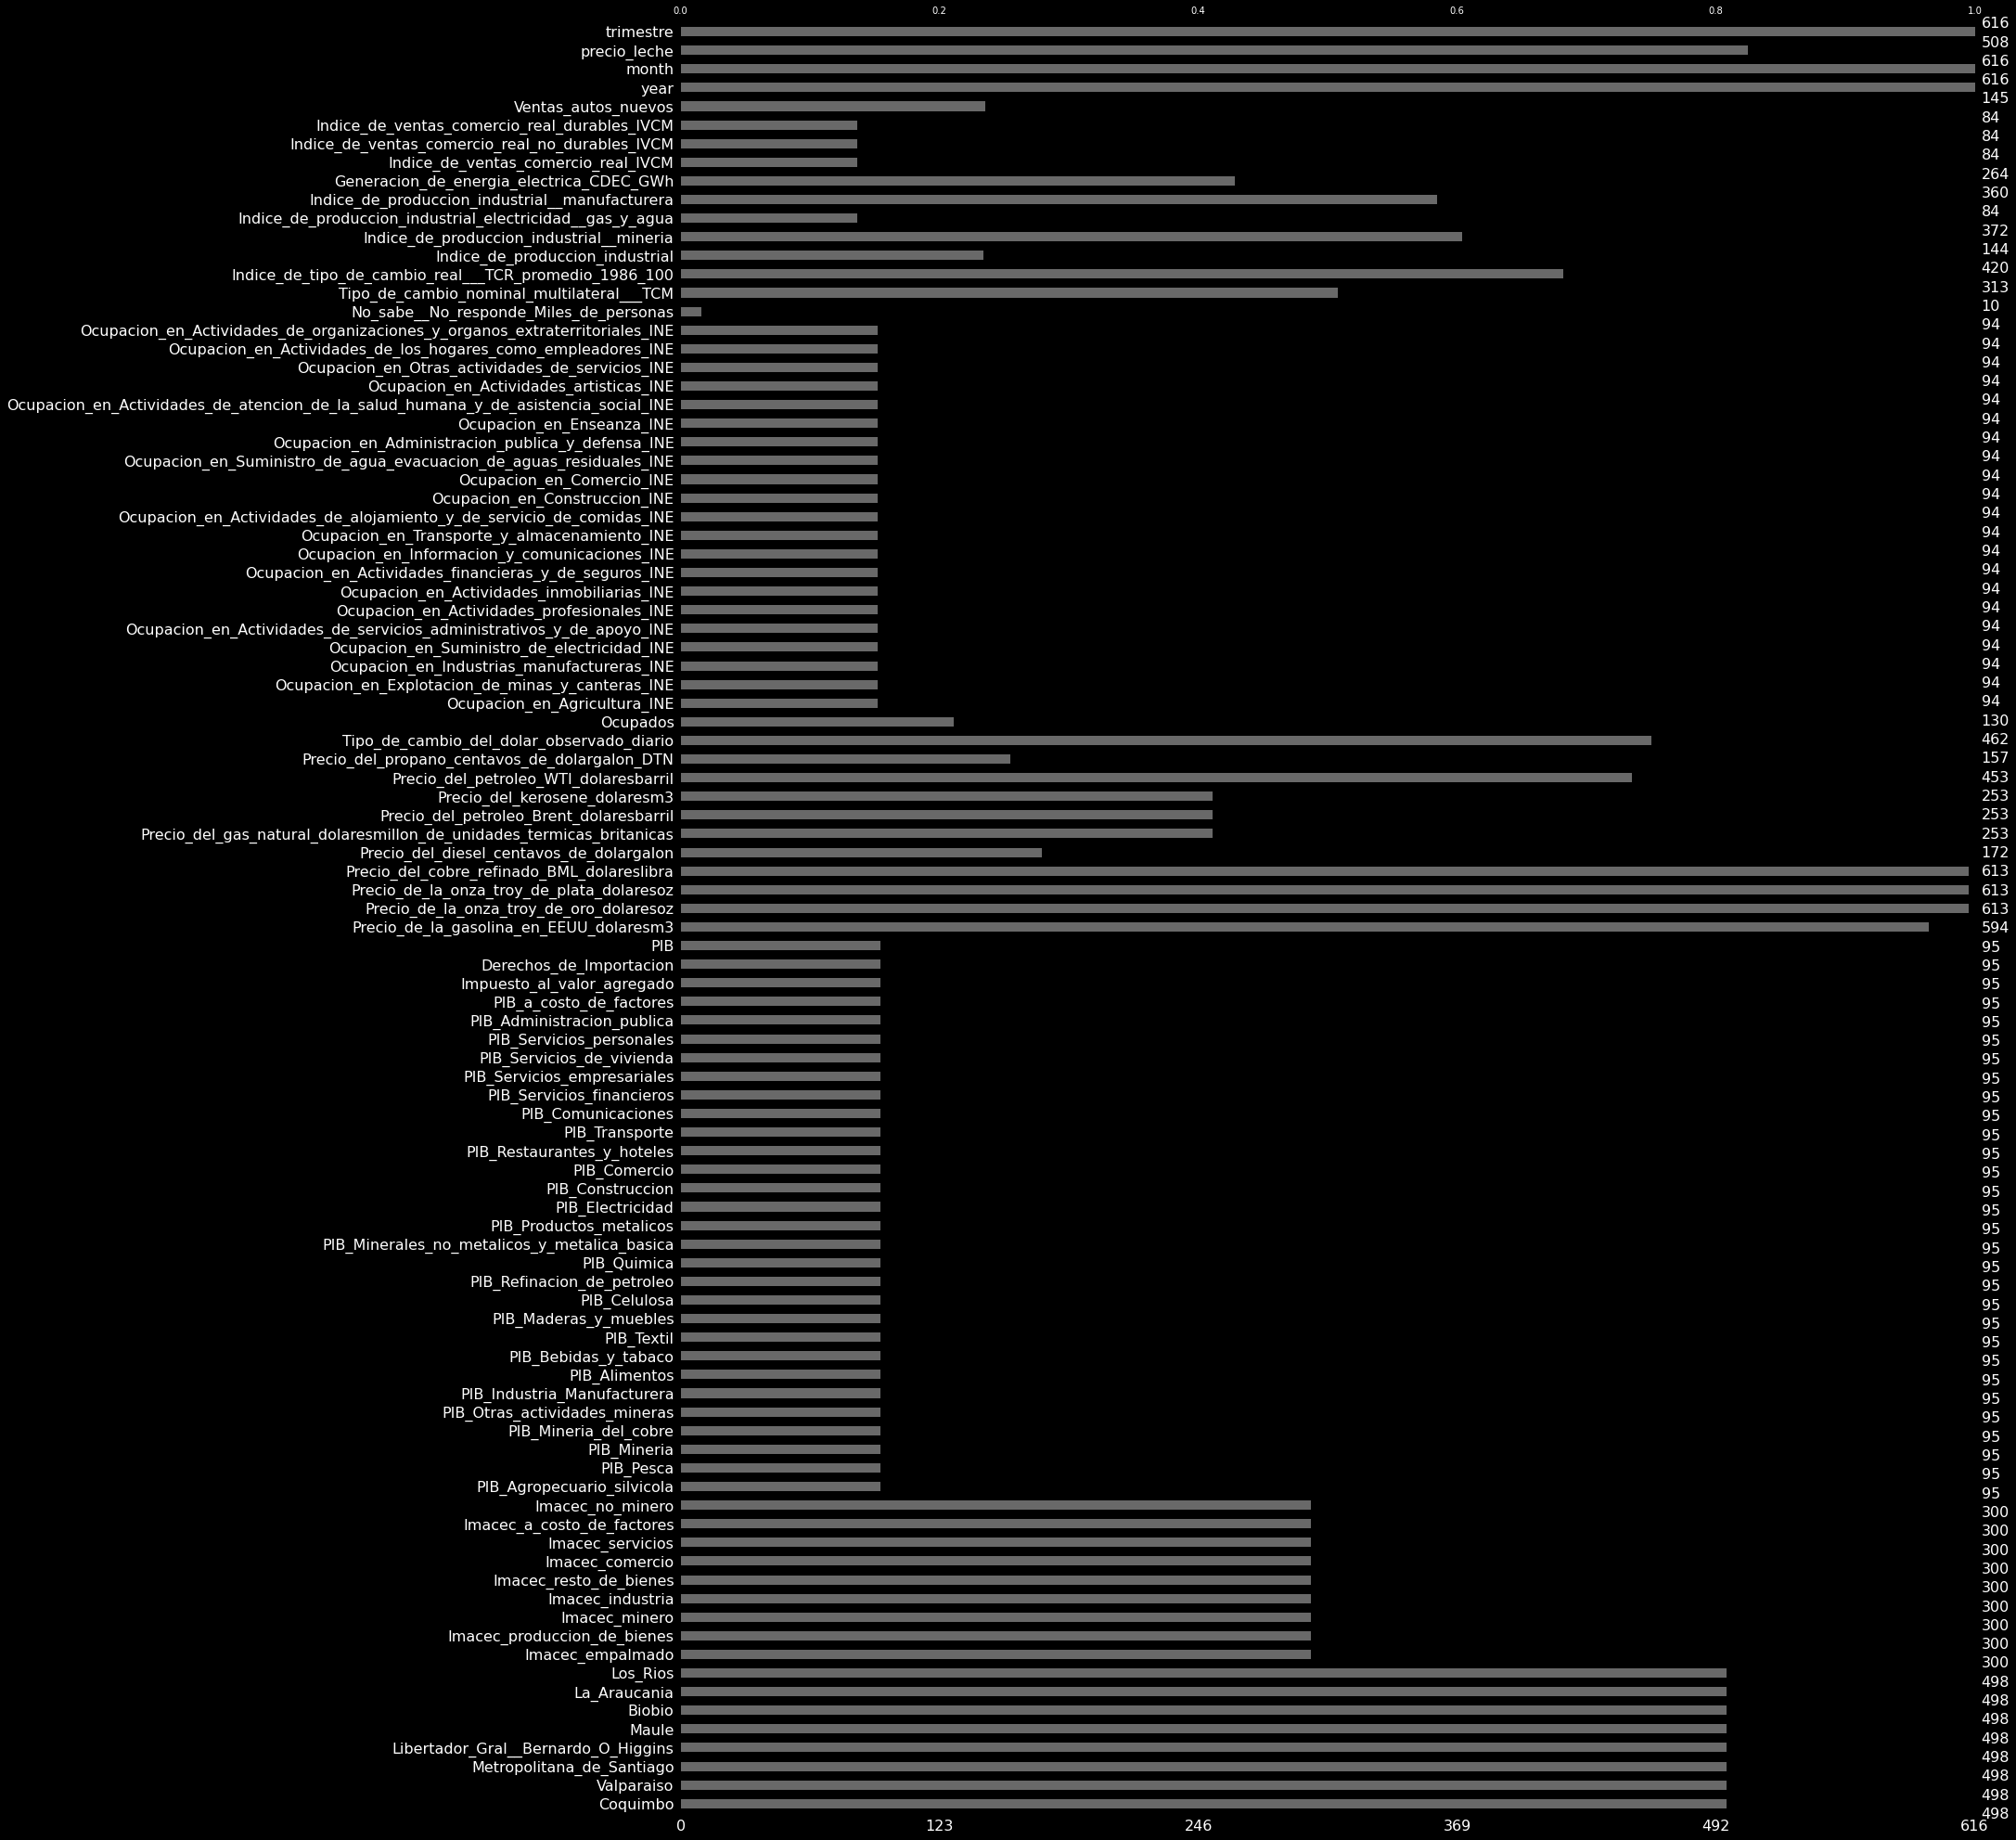

In [66]:
msno.bar(df)

In [67]:
nans = pd.DataFrame(df.isna().sum(), columns=["missing"])
nans.reset_index(drop=False, inplace=True)
nans.rename(columns={"index": "columna"}, inplace=True)
nans["porcentaje_nans"] = nans["missing"] / len(df) * 100

In [68]:
threshold_nans = 50
# columnas con un porcentaje de nans superior al threshold_nans 
tm_nans = list(nans[nans["porcentaje_nans"] <= threshold_nans]["columna"])
print(tm_nans, len(tm_nans))

['Coquimbo', 'Valparaiso', 'Metropolitana_de_Santiago', 'Libertador_Gral__Bernardo_O_Higgins', 'Maule', 'Biobio', 'La_Araucania', 'Los_Rios', 'Precio_de_la_gasolina_en_EEUU_dolaresm3', 'Precio_de_la_onza_troy_de_oro_dolaresoz', 'Precio_de_la_onza_troy_de_plata_dolaresoz', 'Precio_del_cobre_refinado_BML_dolareslibra', 'Precio_del_petroleo_WTI_dolaresbarril', 'Tipo_de_cambio_del_dolar_observado_diario', 'Tipo_de_cambio_nominal_multilateral___TCM', 'Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100', 'Indice_de_produccion_industrial__mineria', 'Indice_de_produccion_industrial__manufacturera', 'year', 'month', 'precio_leche', 'trimestre'] 22


Columnas que me parecen relevantes que pueden tienen relación con la demanda de leche, externalidades positivas y negativas del negocio de la leche --> Influencia directa en el precio de la misma

In [69]:
business_cols = ['precio_leche', 'PIB_Agropecuario_silvicola',
                 'PIB_Mineria_del_cobre', 'PIB_Alimentos', 'PIB_Comercio',
                 'PIB_Transporte', 'Impuesto_al_valor_agregado',
                 'Derechos_de_Importacion', 'PIB', 'Coquimbo', 'Valparaiso',
                 'Metropolitana_de_Santiago',
                 'Libertador_Gral__Bernardo_O_Higgins', 'Maule', 'Biobio',
                 'La_Araucania', 'Los_Rios', 'Imacec_comercio',
                 'Imacec_no_minero', 'Ocupacion_en_Agricultura_INE',
                 'Ocupacion_en_Transporte_y_almacenamiento_INE',
                 'Ocupacion_en_Actividades_de_alojamiento_y_de_servicio_de_comidas_INE',
                 'Indice_de_produccion_industrial',
                 'Indice_de_produccion_industrial__mineria',
                 'Indice_de_ventas_comercio_real_IVCM']

In [70]:
to_feature_engineering = list(pd.DataFrame(tm_nans + important_cols + business_cols, columns=["col"])["col"].unique())

In [71]:
len(to_feature_engineering)

44

In [72]:
df = df[to_feature_engineering]

In [73]:
db = db[["date"] + to_feature_engineering]

In [74]:
print(db.shape)
path_save = "data/clean/to_be_featured.csv"
db.to_csv(path_save)

(616, 45)


In [75]:
import pandas as pd
from datetime import datetime
from src.preprocessing.cleaner import actual_nans_df
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

In [76]:
# columnas que corresponde a features
features = list(db.columns)
features.remove("precio_leche")
features.remove("date")
db = db[["date", "precio_leche"] + features]
db.sort_values(by=["date"], inplace=True, ascending=False)
db.reset_index(drop=True, inplace=True)

# filtro en la temporalidad que tenemos la columna target
initial_date_milk = "1979-01-01"
initial_date_milk = datetime.strptime(initial_date_milk, date_format)
final_date_milk = "2020-05-01"
final_date_milk = datetime.strptime(final_date_milk, date_format)

# filtro
db = db[(db["date"] > initial_date_milk) & (db["date"] < final_date_milk)]
db.reset_index(drop=True, inplace=True)

In [77]:
# nans
cols_nans = actual_nans_df(db, threshold=50)
# columans que tinene menor al 50 % de nans
db = db[cols_nans]
features = list(db.columns)
features.remove("precio_leche")
features.remove("date")
# solo procesar los features [debo normalizar antes de hacer la imputación]
x = db[features]
# Normalizar datos X
sc = MinMaxScaler(feature_range=(0, 1))
# training
x = sc.fit_transform(x)

Hacer imputacion de nans podria imputar con backward, fordward, mean, median e interpolaciones lineales en la serie de tiempo, pero hay periodos que tienen muchos vacios, por lo cual sería muy erratica la imputación, por tanto voy a hacer KNN imputation (que es el imputador por default para problemas de regresión) con el fin de tratar los valores faltantes, para no perder información

In [78]:
# hacer imputacion de nans
# podria imputar con interpolaciones lineales en la serie de tiempo, pero
# hay periodos que tienen muchos vacios, por tanto voy a hacer alguna técnica
# fancy de imputación de nans
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
imputer.fit(x)
x_features = imputer.transform(x)
x_features = sc.inverse_transform(x_features)
x_features = pd.DataFrame(x_features, columns=features)
others = db[["date", "precio_leche"]]
# datos imputados
db_imputed = pd.concat([others, x_features], axis=1)

In [79]:
db_imputed.shape
db = db_imputed.copy()

In [80]:
db.isna().sum()

date                                                     0
precio_leche                                             0
Coquimbo                                                 0
Valparaiso                                               0
Metropolitana_de_Santiago                                0
Libertador_Gral__Bernardo_O_Higgins                      0
Maule                                                    0
Biobio                                                   0
La_Araucania                                             0
Los_Rios                                                 0
Precio_de_la_gasolina_en_EEUU_dolaresm3                  0
Precio_de_la_onza_troy_de_oro_dolaresoz                  0
Precio_de_la_onza_troy_de_plata_dolaresoz                0
Precio_del_cobre_refinado_BML_dolareslibra               0
Precio_del_petroleo_WTI_dolaresbarril                    0
Tipo_de_cambio_del_dolar_observado_diario                0
Tipo_de_cambio_nominal_multilateral___TCM               

Afortunadamente no perdimos tantos registros por culpa de los nans en el dataset, ahora empieza toda la etapa de crear nuevas features y finalmente seleccionar las que se utilizaran en el modelo final

In [81]:
def add_lagged_variables(df, columns, nr_of_lags=1):
    """
    Agregar variables pasadas del dataframe con el que se esta trabajando

    Parameters
    ----------
    df_input : pandas.dataframe
        Dataframe a operar.
    nr_of_lags : int
        Número de steps que quirees ir hacia atrás.
    columns : list
        Lista de columas a las cuales agregar variables lagged.

    Returns
    -------
    df : pandas.dataframe
        Dataframe con las variables lag agregadas.
    """

    for col in columns:
        lagged_column = col + f'_lagged_{str(nr_of_lags)}'
        df[lagged_column] = df[col].shift(nr_of_lags)
    return df


def cumulative_simple_stats(df, cols, window=3):
    """
    En una ventana temporal de tamaño window, se hace el cálculo de las medias
    mobiles en el tiempo y desviaciones estandar mobiles, solo para tener en
    cuenta el tamaño de la ventana debe ser mayor a 2

    Parameters
    ----------
    df : pandas.dataframe
        Dataframe a tratar.
    cols : list
        Lista de las columnas en las cuales aplicar stats.
    window : int, optional
        Tamaño de la ventana temporal. The default is 3.

    Returns
    -------
    df : pandas.dataframe
        Dataframe con las stats calculadas.

    """
    df.sort_values(by=['date'], inplace=True)
    # como se ven estacionalidades, nos centraremos en stats cercanas, al mes
    # que estamos analizando
    for columna in cols:
        # promedio 3 meses
        name1 = columna + f'_mean_{str(window)}'
        df[name1] = df[columna].rolling(window=window).mean()
        # desviacion standar ultimo año
        name2 = columna + f'_std_{str(window)}'
        df[name2] = df[columna].rolling(window=window).std()
    df.reset_index(drop=True, inplace=True)
    return df


def cumulative_distribution_stats(df, cols, window=12):
    """
    En una ventana temporal de tamaño window, se hace el cálculo de stats
    acumulativas como la como promedio y stad

    Parameters
    ----------
    df : pandas.dataframe
        Dataframe a tratar.
    cols : list
        Lista de las columnas en las cuales aplicar stats.
    window : int, optional
        Tamaño de la ventana temporal. The default is 3.

    Returns
    -------
    df : pandas.dataframe
        Dataframe con las stats calculadas.

    """
    df.sort_values(by=['date'], inplace=True)
    # como se ven estacionalidades, nos centraremos en stats cercanas, al mes
    # que estamos analizando
    for columna in cols:
        # promedio 3 meses
        name1 = columna + f'_kurt_{str(window)}'
        df[name1] = df[columna].rolling(window=window).kurt()
        # desviacion standar ultimo año
        name2 = columna + f'_skew_{str(window)}'
        df[name2] = df[columna].rolling(window=window).skew()
    df.reset_index(drop=True, inplace=True)
    return df


def log_features(df, columns):
    """
    Agregar logaritmo de las variables

    Parameters
    ----------
    df : pandas.dataframe
        Dataframe a operar.
    columns : list
        lista de columas a las cuales agregar variables aplicar log.

    Returns
    -------
    df : df
        Dataframe con las variables agregadas con logaritmo.

    """
    for col in columns:
        log_column = 'log_' + col
        df[log_column] = df[col].apply(lambda x: np.log(x) + 1)
    return df

db.sort_values(by=["date"], inplace=True, ascending=True)
db.reset_index(drop=True, inplace=True)

In [82]:
cols = list(db.columns)
cols.remove("date")

In [83]:
# lag de 1 mes hacía atrás
db = add_lagged_variables(db, cols, nr_of_lags=1)
# lag de un trimestre hacía atrás
db = add_lagged_variables(db, cols, nr_of_lags=4)
# lag de 1 año
db = add_lagged_variables(db, cols, nr_of_lags=12)
# lag de dos años
db = add_lagged_variables(db, cols, nr_of_lags=24)

In [84]:
# estadisticas acumuladas de 3 meses
db = cumulative_simple_stats(db, cols, window=3)
# estadisticas acumuladas de 4 meses
db = cumulative_simple_stats(db, cols, window=4)
# estadisticas acumuladas de 12 meses
db = cumulative_simple_stats(db, cols, window=12)
# estadisticas acumuladas de 24 meses
db = cumulative_simple_stats(db, cols, window=24)

In [85]:
# # estadisticas acumuladas de 12 mes
db = cumulative_distribution_stats(db, cols, window=12)
# estadisticas acumuladas de 24 mes
db = cumulative_distribution_stats(db, cols, window=24)

In [86]:
# features logaritmicos
db = log_features(db, cols)

In [87]:
from src.preprocessing.cleaner import actual_nans_df
percentage = (1 - 24 / len(db)) * 100
cols_nans = actual_nans_df(db, threshold=50)
print(len(cols_nans))
print(db.shape)

559
(497, 559)


In [88]:
db.dropna(inplace=True)
db.reset_index(drop=True, inplace=True)

Hemos creado más de 500 features adicionales al modelo que contienen información variada acerca de las distintas columnas, entonces para irme asegurar buena selección lo haré de la forma más automatizada posible, debido al tiempo del desafío, por tanto

In [89]:
from statsmodels.tsa.stattools import adfuller
def stationary_adf_test(df, cols):
    """
    Test de estacionaridad
    Augmented Dickey-Fuller puede ser una de las más utilizadas.
    Utiliza un modelo autorregresivo y optimiza un criterio de información
    a través de múltiples valores de retardo (lags) diferentes.

    La hipótesis nula de la prueba es que la serie de tiempo se puede
    representar mediante una raíz unitaria, que no es estacionaria
    (tiene alguna estructura dependiente del tiempo).

    La hipótesis alternativa (que rechaza la hipótesis nula) es que la serie
    de tiempo es estacionaria.

    * Hipótesis nula (H0): si no se rechaza, sugiere que la serie de tiempo
    tiene una raíz unitaria, lo que significa que no es estacionaria.
    Tiene alguna estructura dependiente del tiempo.

    * Hipótesis alternativa (H1): Se rechaza la hipótesis nula; sugiere que
    la serie de tiempo no tiene una raíz unitaria, lo que significa que es
    estacionaria. No tiene una estructura dependiente del tiempo.

    Voy a interpretar este resultado utilizando el valor p de la prueba.
    Un valor p por debajo de un umbral (como 5% o 1%) sugiere que rechazamos

    la hipótesis nula (estacionaria); de lo contrario, un valor p por encima
    del umbral sugiere que no rechazamos la hipótesis nula (no estacionaria),
    este es el lo clásico en tests estadísticos.

    * Valor p> 0.05: No se rechaza la hipótesis nula (H0),
    los datos no son estacionarios
    * Valor de p <= 0.05: Rechaza la hipótesis nula (H0),
    los datos son estacionarios

    Parameters
    ----------
    df : pandas.dataframe
        dataframe al cual se le harán pruebas de estacionaridad a todas sus
        columnas.
    cols : list
        Lista de columnas.

    Returns
    -------
    output : pandas.dataframe
        Resultados del test.

    """
    output = []
    for col in cols:
        try:
            datai = df[[col]]
            # datai = datai[datai[col] > 0]
            result = adfuller(datai.values)
            # descomprimir valores
            p = result[1]
            print("Para la columna: ", col)
            print(comentary_stationarity(p))
            print('ADF estadisticas: %f' % result[0])
            print('Valor de p: %f' % result[1])
            print('Valores criticos:')
            for key, value in result[4].items():
                print('\t%s: %.3f' % (key, value))
            output.append([col, comentary_stationarity(p),
                          p, list(result[4].items())])
        except Exception:
            print("No hubo convergencia del test")
    output = pd.DataFrame(output, columns=["columna", "resultado",
                                           "valor_p", "intervalos"])
    return output


def comentary_stationarity(p):
    """
    Comentario de la estacionaridad de las
    Parameters
    ----------
    p : float
        p value.
    Returns
    -------
    comments : string
        Comentario acerca de la estacionareidad de la serie.
    """
    if p <= 0.05:
        comments = "Rechaza la hipótesis nula (H0), los datos son estacionarios"
    else:
        comments = "No se rechaza la hipótesis nula (H0), los datos no son estacionarios"
    return comments

In [90]:
stationary_test = stationary_adf_test(db, list(db.columns))

Para la columna:  date
No se rechaza la hipótesis nula (H0), los datos no son estacionarios
ADF estadisticas: 0.097215
Valor de p: 0.965870
Valores criticos:
	1%: -3.446
	5%: -2.869
	10%: -2.571
Para la columna:  precio_leche
No se rechaza la hipótesis nula (H0), los datos no son estacionarios
ADF estadisticas: 1.284604
Valor de p: 0.996521
Valores criticos:
	1%: -3.446
	5%: -2.869
	10%: -2.571
Para la columna:  Coquimbo
Rechaza la hipótesis nula (H0), los datos son estacionarios
ADF estadisticas: -5.449785
Valor de p: 0.000003
Valores criticos:
	1%: -3.446
	5%: -2.868
	10%: -2.570
Para la columna:  Valparaiso
Rechaza la hipótesis nula (H0), los datos son estacionarios
ADF estadisticas: -5.501388
Valor de p: 0.000002
Valores criticos:
	1%: -3.446
	5%: -2.868
	10%: -2.570
Para la columna:  Metropolitana_de_Santiago
Rechaza la hipótesis nula (H0), los datos son estacionarios
ADF estadisticas: -5.518387
Valor de p: 0.000002
Valores criticos:
	1%: -3.446
	5%: -2.868
	10%: -2.570
Para la co

Para la columna:  Precio_del_petroleo_WTI_dolaresbarril_lagged_1
No se rechaza la hipótesis nula (H0), los datos no son estacionarios
ADF estadisticas: -1.903859
Valor de p: 0.330248
Valores criticos:
	1%: -3.446
	5%: -2.869
	10%: -2.571
Para la columna:  Tipo_de_cambio_del_dolar_observado_diario_lagged_1
No se rechaza la hipótesis nula (H0), los datos no son estacionarios
ADF estadisticas: -2.042946
Valor de p: 0.268066
Valores criticos:
	1%: -3.446
	5%: -2.869
	10%: -2.570
Para la columna:  Tipo_de_cambio_nominal_multilateral___TCM_lagged_1
Rechaza la hipótesis nula (H0), los datos son estacionarios
ADF estadisticas: -4.322449
Valor de p: 0.000406
Valores criticos:
	1%: -3.446
	5%: -2.868
	10%: -2.570
Para la columna:  Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100_lagged_1
Rechaza la hipótesis nula (H0), los datos son estacionarios
ADF estadisticas: -3.415775
Valor de p: 0.010433
Valores criticos:
	1%: -3.446
	5%: -2.868
	10%: -2.570
Para la columna:  Indice_de_produccion_ind

	5%: -2.869
	10%: -2.570
Para la columna:  year_lagged_4
No se rechaza la hipótesis nula (H0), los datos no son estacionarios
ADF estadisticas: -1.269751
Valor de p: 0.642895
Valores criticos:
	1%: -3.446
	5%: -2.868
	10%: -2.570
Para la columna:  month_lagged_4
Rechaza la hipótesis nula (H0), los datos son estacionarios
ADF estadisticas: -346132292755674.375000
Valor de p: 0.000000
Valores criticos:
	1%: -3.446
	5%: -2.868
	10%: -2.570
Para la columna:  trimestre_lagged_4
Rechaza la hipótesis nula (H0), los datos son estacionarios
ADF estadisticas: -3246027541661207.500000
Valor de p: 0.000000
Valores criticos:
	1%: -3.446
	5%: -2.869
	10%: -2.571
Para la columna:  Imacec_empalmado_lagged_4
No se rechaza la hipótesis nula (H0), los datos no son estacionarios
ADF estadisticas: 1.603339
Valor de p: 0.997868
Valores criticos:
	1%: -3.446
	5%: -2.869
	10%: -2.570
Para la columna:  Imacec_produccion_de_bienes_lagged_4
No se rechaza la hipótesis nula (H0), los datos no son estacionarios
ADF

Para la columna:  Generacion_de_energia_electrica_CDEC_GWh_lagged_12
No se rechaza la hipótesis nula (H0), los datos no son estacionarios
ADF estadisticas: 1.740238
Valor de p: 0.998223
Valores criticos:
	1%: -3.446
	5%: -2.868
	10%: -2.570
Para la columna:  precio_leche_lagged_24
No se rechaza la hipótesis nula (H0), los datos no son estacionarios
ADF estadisticas: 0.118673
Valor de p: 0.967313
Valores criticos:
	1%: -3.446
	5%: -2.869
	10%: -2.571
Para la columna:  Coquimbo_lagged_24
Rechaza la hipótesis nula (H0), los datos son estacionarios
ADF estadisticas: -5.713461
Valor de p: 0.000001
Valores criticos:
	1%: -3.446
	5%: -2.868
	10%: -2.570
Para la columna:  Valparaiso_lagged_24
Rechaza la hipótesis nula (H0), los datos son estacionarios
ADF estadisticas: -5.908066
Valor de p: 0.000000
Valores criticos:
	1%: -3.446
	5%: -2.868
	10%: -2.570
Para la columna:  Metropolitana_de_Santiago_lagged_24
Rechaza la hipótesis nula (H0), los datos son estacionarios
ADF estadisticas: -5.917705


Para la columna:  Metropolitana_de_Santiago_mean_3
Rechaza la hipótesis nula (H0), los datos son estacionarios
ADF estadisticas: -3.965691
Valor de p: 0.001601
Valores criticos:
	1%: -3.446
	5%: -2.869
	10%: -2.571
Para la columna:  Metropolitana_de_Santiago_std_3
Rechaza la hipótesis nula (H0), los datos son estacionarios
ADF estadisticas: -5.454750
Valor de p: 0.000003
Valores criticos:
	1%: -3.446
	5%: -2.868
	10%: -2.570
Para la columna:  Libertador_Gral__Bernardo_O_Higgins_mean_3
Rechaza la hipótesis nula (H0), los datos son estacionarios
ADF estadisticas: -3.879657
Valor de p: 0.002190
Valores criticos:
	1%: -3.446
	5%: -2.869
	10%: -2.571
Para la columna:  Libertador_Gral__Bernardo_O_Higgins_std_3
Rechaza la hipótesis nula (H0), los datos son estacionarios
ADF estadisticas: -5.333137
Valor de p: 0.000005
Valores criticos:
	1%: -3.446
	5%: -2.868
	10%: -2.570
Para la columna:  Maule_mean_3
Rechaza la hipótesis nula (H0), los datos son estacionarios
ADF estadisticas: -3.958758
Val

Para la columna:  Imacec_produccion_de_bienes_mean_3
No se rechaza la hipótesis nula (H0), los datos no son estacionarios
ADF estadisticas: 1.113089
Valor de p: 0.995327
Valores criticos:
	1%: -3.446
	5%: -2.869
	10%: -2.570
Para la columna:  Imacec_produccion_de_bienes_std_3
No se rechaza la hipótesis nula (H0), los datos no son estacionarios
ADF estadisticas: -1.791361
Valor de p: 0.384759
Valores criticos:
	1%: -3.446
	5%: -2.869
	10%: -2.570
Para la columna:  Imacec_industria_mean_3
No se rechaza la hipótesis nula (H0), los datos no son estacionarios
ADF estadisticas: 0.337054
Valor de p: 0.978982
Valores criticos:
	1%: -3.446
	5%: -2.869
	10%: -2.570
Para la columna:  Imacec_industria_std_3
No se rechaza la hipótesis nula (H0), los datos no son estacionarios
ADF estadisticas: -1.990831
Valor de p: 0.290608
Valores criticos:
	1%: -3.446
	5%: -2.868
	10%: -2.570
Para la columna:  Imacec_resto_de_bienes_mean_3
No se rechaza la hipótesis nula (H0), los datos no son estacionarios
ADF e

Para la columna:  Precio_del_cobre_refinado_BML_dolareslibra_std_4
Rechaza la hipótesis nula (H0), los datos son estacionarios
ADF estadisticas: -6.110478
Valor de p: 0.000000
Valores criticos:
	1%: -3.446
	5%: -2.868
	10%: -2.570
Para la columna:  Precio_del_petroleo_WTI_dolaresbarril_mean_4
No se rechaza la hipótesis nula (H0), los datos no son estacionarios
ADF estadisticas: -1.880436
Valor de p: 0.341320
Valores criticos:
	1%: -3.446
	5%: -2.868
	10%: -2.570
Para la columna:  Precio_del_petroleo_WTI_dolaresbarril_std_4
Rechaza la hipótesis nula (H0), los datos son estacionarios
ADF estadisticas: -3.044321
Valor de p: 0.030958
Valores criticos:
	1%: -3.446
	5%: -2.868
	10%: -2.570
Para la columna:  Tipo_de_cambio_del_dolar_observado_diario_mean_4
No se rechaza la hipótesis nula (H0), los datos no son estacionarios
ADF estadisticas: -1.886604
Valor de p: 0.338389
Valores criticos:
	1%: -3.446
	5%: -2.869
	10%: -2.570
Para la columna:  Tipo_de_cambio_del_dolar_observado_diario_std_4
N

Para la columna:  Valparaiso_mean_12
Rechaza la hipótesis nula (H0), los datos son estacionarios
ADF estadisticas: -3.522274
Valor de p: 0.007433
Valores criticos:
	1%: -3.446
	5%: -2.868
	10%: -2.570
Para la columna:  Valparaiso_std_12
Rechaza la hipótesis nula (H0), los datos son estacionarios
ADF estadisticas: -3.388101
Valor de p: 0.011371
Valores criticos:
	1%: -3.446
	5%: -2.868
	10%: -2.570
Para la columna:  Metropolitana_de_Santiago_mean_12
Rechaza la hipótesis nula (H0), los datos son estacionarios
ADF estadisticas: -3.270510
Valor de p: 0.016249
Valores criticos:
	1%: -3.446
	5%: -2.868
	10%: -2.570
Para la columna:  Metropolitana_de_Santiago_std_12
Rechaza la hipótesis nula (H0), los datos son estacionarios
ADF estadisticas: -3.007785
Valor de p: 0.034174
Valores criticos:
	1%: -3.446
	5%: -2.868
	10%: -2.570
Para la columna:  Libertador_Gral__Bernardo_O_Higgins_mean_12
Rechaza la hipótesis nula (H0), los datos son estacionarios
ADF estadisticas: -3.094166
Valor de p: 0.0269

Para la columna:  Imacec_empalmado_mean_12
No se rechaza la hipótesis nula (H0), los datos no son estacionarios
ADF estadisticas: 0.885273
Valor de p: 0.992895
Valores criticos:
	1%: -3.446
	5%: -2.868
	10%: -2.570
Para la columna:  Imacec_empalmado_std_12
No se rechaza la hipótesis nula (H0), los datos no son estacionarios
ADF estadisticas: -0.738183
Valor de p: 0.836610
Valores criticos:
	1%: -3.446
	5%: -2.869
	10%: -2.571
Para la columna:  Imacec_produccion_de_bienes_mean_12
No se rechaza la hipótesis nula (H0), los datos no son estacionarios
ADF estadisticas: 1.493632
Valor de p: 0.997501
Valores criticos:
	1%: -3.446
	5%: -2.868
	10%: -2.570
Para la columna:  Imacec_produccion_de_bienes_std_12
No se rechaza la hipótesis nula (H0), los datos no son estacionarios
ADF estadisticas: -0.818211
Valor de p: 0.813714
Valores criticos:
	1%: -3.446
	5%: -2.868
	10%: -2.570
Para la columna:  Imacec_industria_mean_12
No se rechaza la hipótesis nula (H0), los datos no son estacionarios
ADF es

Para la columna:  Precio_de_la_onza_troy_de_plata_dolaresoz_mean_24
No se rechaza la hipótesis nula (H0), los datos no son estacionarios
ADF estadisticas: -1.818717
Valor de p: 0.371210
Valores criticos:
	1%: -3.446
	5%: -2.868
	10%: -2.570
Para la columna:  Precio_de_la_onza_troy_de_plata_dolaresoz_std_24
No se rechaza la hipótesis nula (H0), los datos no son estacionarios
ADF estadisticas: -2.607840
Valor de p: 0.091388
Valores criticos:
	1%: -3.446
	5%: -2.868
	10%: -2.570
Para la columna:  Precio_del_cobre_refinado_BML_dolareslibra_mean_24
Rechaza la hipótesis nula (H0), los datos son estacionarios
ADF estadisticas: -3.257596
Valor de p: 0.016884
Valores criticos:
	1%: -3.446
	5%: -2.869
	10%: -2.571
Para la columna:  Precio_del_cobre_refinado_BML_dolareslibra_std_24
Rechaza la hipótesis nula (H0), los datos son estacionarios
ADF estadisticas: -3.365856
Valor de p: 0.012179
Valores criticos:
	1%: -3.446
	5%: -2.868
	10%: -2.570
Para la columna:  Precio_del_petroleo_WTI_dolaresbarri

Para la columna:  precio_leche_kurt_12
Rechaza la hipótesis nula (H0), los datos son estacionarios
ADF estadisticas: -10.349826
Valor de p: 0.000000
Valores criticos:
	1%: -3.446
	5%: -2.868
	10%: -2.570
Para la columna:  precio_leche_skew_12
Rechaza la hipótesis nula (H0), los datos son estacionarios
ADF estadisticas: -6.091835
Valor de p: 0.000000
Valores criticos:
	1%: -3.446
	5%: -2.868
	10%: -2.570
Para la columna:  Coquimbo_kurt_12
Rechaza la hipótesis nula (H0), los datos son estacionarios
ADF estadisticas: -6.283291
Valor de p: 0.000000
Valores criticos:
	1%: -3.446
	5%: -2.868
	10%: -2.570
Para la columna:  Coquimbo_skew_12
Rechaza la hipótesis nula (H0), los datos son estacionarios
ADF estadisticas: -6.604702
Valor de p: 0.000000
Valores criticos:
	1%: -3.446
	5%: -2.868
	10%: -2.570
Para la columna:  Valparaiso_kurt_12
Rechaza la hipótesis nula (H0), los datos son estacionarios
ADF estadisticas: -5.042697
Valor de p: 0.000018
Valores criticos:
	1%: -3.446
	5%: -2.868
	10%: -

Para la columna:  year_skew_12
Rechaza la hipótesis nula (H0), los datos son estacionarios
ADF estadisticas: -971441974919.645996
Valor de p: 0.000000
Valores criticos:
	1%: -3.446
	5%: -2.868
	10%: -2.570
Para la columna:  month_kurt_12
No se rechaza la hipótesis nula (H0), los datos no son estacionarios
ADF estadisticas: 20.870125
Valor de p: 1.000000
Valores criticos:
	1%: -3.446
	5%: -2.869
	10%: -2.571
Para la columna:  month_skew_12
Rechaza la hipótesis nula (H0), los datos son estacionarios
ADF estadisticas: -43.145378
Valor de p: 0.000000
Valores criticos:
	1%: -3.446
	5%: -2.869
	10%: -2.570
Para la columna:  trimestre_kurt_12
Rechaza la hipótesis nula (H0), los datos son estacionarios
ADF estadisticas: -15.746299
Valor de p: 0.000000
Valores criticos:
	1%: -3.446
	5%: -2.868
	10%: -2.570
Para la columna:  trimestre_skew_12
No se rechaza la hipótesis nula (H0), los datos no son estacionarios
ADF estadisticas: -2.328536
Valor de p: 0.162930
Valores criticos:
	1%: -3.446
	5%: -2

Para la columna:  Los_Rios_skew_24
Rechaza la hipótesis nula (H0), los datos son estacionarios
ADF estadisticas: -2.941863
Valor de p: 0.040692
Valores criticos:
	1%: -3.446
	5%: -2.868
	10%: -2.570
Para la columna:  Precio_de_la_gasolina_en_EEUU_dolaresm3_kurt_24
Rechaza la hipótesis nula (H0), los datos son estacionarios
ADF estadisticas: -4.352576
Valor de p: 0.000360
Valores criticos:
	1%: -3.446
	5%: -2.868
	10%: -2.570
Para la columna:  Precio_de_la_gasolina_en_EEUU_dolaresm3_skew_24
Rechaza la hipótesis nula (H0), los datos son estacionarios
ADF estadisticas: -4.135502
Valor de p: 0.000846
Valores criticos:
	1%: -3.446
	5%: -2.868
	10%: -2.570
Para la columna:  Precio_de_la_onza_troy_de_oro_dolaresoz_kurt_24
Rechaza la hipótesis nula (H0), los datos son estacionarios
ADF estadisticas: -11.256796
Valor de p: 0.000000
Valores criticos:
	1%: -3.446
	5%: -2.868
	10%: -2.570
Para la columna:  Precio_de_la_onza_troy_de_oro_dolaresoz_skew_24
Rechaza la hipótesis nula (H0), los datos so

Para la columna:  Imacec_no_minero_kurt_24
Rechaza la hipótesis nula (H0), los datos son estacionarios
ADF estadisticas: -4.414221
Valor de p: 0.000280
Valores criticos:
	1%: -3.446
	5%: -2.868
	10%: -2.570
Para la columna:  Imacec_no_minero_skew_24
Rechaza la hipótesis nula (H0), los datos son estacionarios
ADF estadisticas: -4.868569
Valor de p: 0.000040
Valores criticos:
	1%: -3.446
	5%: -2.868
	10%: -2.570
Para la columna:  Generacion_de_energia_electrica_CDEC_GWh_kurt_24
Rechaza la hipótesis nula (H0), los datos son estacionarios
ADF estadisticas: -3.380922
Valor de p: 0.011627
Valores criticos:
	1%: -3.446
	5%: -2.868
	10%: -2.570
Para la columna:  Generacion_de_energia_electrica_CDEC_GWh_skew_24
Rechaza la hipótesis nula (H0), los datos son estacionarios
ADF estadisticas: -3.106773
Valor de p: 0.026056
Valores criticos:
	1%: -3.446
	5%: -2.868
	10%: -2.570
Para la columna:  log_precio_leche
Rechaza la hipótesis nula (H0), los datos son estacionarios
ADF estadisticas: -4.305693
V

In [91]:
cols_stationaries = list(
    stationary_test[stationary_test["valor_p"] <= 0.05]["columna"])

In [92]:
cols_stationaries = ["date", "precio_leche"] + cols_stationaries

In [93]:
len(cols_stationaries)

308

In [96]:
db = db[cols_stationaries]
print(db.shape)

(432, 308)


Nos quedamos únicamente con las columnas que fueron positivas en el test de estacionareidad, para que realicé esto?  cuando los datos series de tiempo multivariadas, no son estacionarios, los coeficientes de la matriz de covarianza no son estables, por lo tanto es mejor asegurarse que estos sean estacionarios para aplicar PCA sobre ellos. Primero ejecutamos la prueba de estacionariedad para decidir si los datos del MTS son estacionarios o no.

Al hacer análisis de componentes principales, proyectaremos los datos en un nuevo espacio vectorial (PC) con el fin de reducir la dimensioanlidad de los datos, estos eigen vectors son ortogonales entre sí, por lo que será perfecto para entrenar algoritmos como regresiones lineales en buscamos evitar multicolinealidad

Otra opción a este camino, la dejo señalada, podría haber agarrado las columans y hacer feature selection en base a matrices de correlación, con el fin de seleccionar manualmente las mejores features para el problema, este es un super buena aproach, pero debido al tiempo que podría tomarme, prefiero ir por el camino más corto y automatico.

Antes de proceder con PCA, debo estadarizar los datos.

In [97]:
from sklearn.preprocessing import StandardScaler

In [98]:
features = list(db.columns)
features.remove("precio_leche")
features.remove("date")

In [100]:
print(len(features))
features

306


['Coquimbo',
 'Valparaiso',
 'Metropolitana_de_Santiago',
 'Libertador_Gral__Bernardo_O_Higgins',
 'Maule',
 'Biobio',
 'La_Araucania',
 'Los_Rios',
 'Tipo_de_cambio_nominal_multilateral___TCM',
 'Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100',
 'trimestre',
 'Coquimbo_lagged_1',
 'Valparaiso_lagged_1',
 'Metropolitana_de_Santiago_lagged_1',
 'Libertador_Gral__Bernardo_O_Higgins_lagged_1',
 'Maule_lagged_1',
 'Biobio_lagged_1',
 'La_Araucania_lagged_1',
 'Los_Rios_lagged_1',
 'Precio_del_cobre_refinado_BML_dolareslibra_lagged_1',
 'Tipo_de_cambio_nominal_multilateral___TCM_lagged_1',
 'Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100_lagged_1',
 'trimestre_lagged_1',
 'Coquimbo_lagged_4',
 'Valparaiso_lagged_4',
 'Metropolitana_de_Santiago_lagged_4',
 'Libertador_Gral__Bernardo_O_Higgins_lagged_4',
 'Maule_lagged_4',
 'Biobio_lagged_4',
 'La_Araucania_lagged_4',
 'Los_Rios_lagged_4',
 'Precio_del_cobre_refinado_BML_dolareslibra_lagged_4',
 'Tipo_de_cambio_nominal_multilate

In [101]:
# solo procesar los features [debo normalizar antes de hacer la imputación]
x = db[features]
# Normalizar datos X
sc = StandardScaler()
# training
x = sc.fit_transform(x)

In [102]:
x.shape

(432, 306)

In [103]:
from sklearn.decomposition import PCA

In [114]:
pca = PCA(n_components=0.9)
x_pca = pca.fit_transform(x)
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

In [115]:
x_pca.shape

(432, 51)

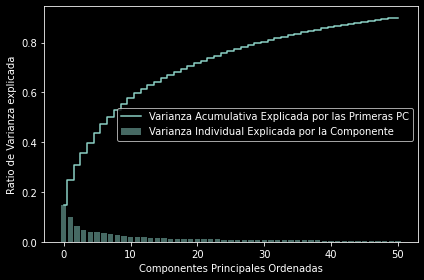

In [116]:
plt.bar(range(0,len(exp_var_pca)), exp_var_pca,
        alpha=0.5, align='center',
        label='Varianza Individual Explicada por la Componente')
plt.step(range(0,len(cum_sum_eigenvalues)),
         cum_sum_eigenvalues, where='mid',
         label='Varianza Acumulativa Explicada por las Primeras PC')
plt.ylabel('Ratio de Varianza explicada')
plt.xlabel('Componentes Principales Ordenadas')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [119]:
df_features = pd.DataFrame(x_pca)

In [120]:
date = db[["date", "precio_leche"]]

In [122]:
db = pd.concat([date, df_features], axis=1)

In [123]:
db.describe()

precio_leche             0             1             2             3  \
count    432.000000  4.320000e+02  4.320000e+02  4.320000e+02  4.320000e+02   
mean     116.862917 -1.389835e-15  3.037694e-16  2.487722e-16  1.171902e-16   
std       73.706894  6.777809e+00  5.478693e+00  4.350317e+00  3.831705e+00   
min        5.470000 -1.237209e+01 -1.013131e+01 -8.060029e+00 -9.705990e+00   
25%       57.195000 -5.086998e+00 -4.208401e+00 -3.054146e+00 -2.663924e+00   
50%      104.470000 -1.086995e+00 -4.282967e-01 -7.722217e-01 -4.746094e-01   
75%      189.287500  3.622189e+00  3.051521e+00  2.385751e+00  2.778420e+00   
max      316.250000  2.101792e+01  1.627871e+01  1.267023e+01  1.262973e+01   

                  4             5             6             7             8  \
count  4.320000e+02  4.320000e+02  4.320000e+02  4.320000e+02  4.320000e+02   
mean  -2.037979e-16 -1.912051e-16 -3.495147e-17 -5.570390e-16  4.934325e-17   
std    3.534057e+00  3.398945e+00  3.308227e+00  3.084337e+00  2.933780e+00   
min   -9.918615e+00 -1.041276e+01 -7.784985e+00 -7.648607e+00 -1.033903e+01   
25%   -2.061092e+00 -2.063408e+00 -2.537892e+00 -1.757158e+00 -1.333059e+00   
50%    3.698853e-01 -5.126494e-01  3.362388e-01 -4.887080e-01 -8.140446e-02   
75%    1.883589e+00  1.506686e+00  2.203944e+00  1.384115e+00  1.217736e+00   
max    1.171875e+01  1.127404e+01  9.790334e+00  1.498951e+01  2.437127e+01   

       ...            41            42            43            44  \
count  ...  4.320000e+02  4.320000e+02  4.320000e+02  4.320000e+02   
mean   ...  2.184467e-18 -4.523131e-17 -3.726443e-18 -2.441463e-17   
std    ...  1.199301e+00  1.155880e+00  1.151446e+00  1.091892e+00   
min    ... -3.314737e+00 -3.729081e+00 -3.452968e+00 -4.271193e+00   
25%    ... -7.699920e-01 -7.164177e-01 -7.578710e-01 -7.209733e-01   
50%    ...  1.933700e-02  2.012686e-02 -3.504444e-02  2.861177e-02   
75%    ...  7.111460e-01  6.397818e-01  5.862945e-01  7.142693e-01   
max    ...  5.809046e+00  4.320118e+00  4.438456e+00  5.303744e+00   

                 45            46            47            48            49  \
count  4.320000e+02  4.320000e+02  4.320000e+02  4.320000e+02  4.320000e+02   
mean   7.041692e-17  6.174331e-17  1.323530e-16  1.246431e-17  6.681898e-18   
std    1.072504e+00  1.050641e+00  1.037785e+00  1.023954e+00  1.010229e+00   
min   -2.968898e+00 -3.603110e+00 -3.056396e+00 -2.767685e+00 -2.676046e+00   
25%   -7.163385e-01 -6.994669e-01 -6.558630e-01 -6.865432e-01 -7.120792e-01   
50%    5.690979e-02 -1.482899e-02 -1.728665e-02 -7.992176e-03  2.029978e-02   
75%    6.873700e-01  5.945359e-01  6.580665e-01  5.905002e-01  6.912826e-01   
max    4.240326e+00  3.669293e+00  3.263647e+00  3.343776e+00  2.847647e+00   

                 50  
count  4.320000e+02  
mean  -1.341519e-16  
std    9.887100e-01  
min   -3.079938e+00  
25%   -7.039130e-01  
50%   -1.567903e-02  
75%    6.158683e-01  
max    3.229185e+00  

[8 rows x 52 columns]

In [125]:
db.shape

(432, 53)

Dejo abajo funciones que nos hubieran servido para realizar el otro camino de la selección manual de los datos a través de matrices de correlación, no pude probarlo a falta de tiempo

In [124]:
def get_columns_correlated(df, method="pearson", threshold=0.8):
    """
    Obtener las columnas altamente relacionadas de los datos, en función
    de distintos thresholds
    
    Parameters
    ----------
    df : dataframe
        dataframe sobre el cual sacar correlaciones.
    method : string, optional
        metodo de correlacion. The default is "pearson".
    threshold : float, optional
        umbral sobre el cual se considera una correlacion positivo o negagita.
        The default is 0.8.

    Returns
    -------
    correlated_cols : pandas.dataframe
        dataframe con la eliminación de las columnas correlacionadas entre si.
    
    """
    corr_mt = df.corr(method=method)
    corr_mt.reset_index(drop=False, inplace=True)
    corr_mt.rename(columns={"index": "columnas"}, inplace=True)
    correlated_cols = []
    columns = list(corr_mt.columns)
    columns.remove("columnas")
    for col in columns:
        for i in range(len(corr_mt)):
            index = corr_mt["columnas"].iloc[i]
            # print(col, index)
            if index == col:
                pass
            else:
                value = corr_mt[col].iloc[i]
                if value > threshold:
                    string = col + index
                    string = ''.join(sorted(string))
                    corr_cols = [col, index, value,
                                 "correlacion postiviva", string]
                    correlated_cols.append(corr_cols)
                if value < -threshold:
                    string = col + index
                    string = ''.join(sorted(string))
                    corr_cols = [col, index, value,
                                 "correlacion negativa", string]
                    correlated_cols.append(corr_cols)

    correlated_cols = pd.DataFrame(correlated_cols,
                                   columns=["col1", "col2", "correlacion",
                                            "descripcion", "id"])
    correlated_cols.drop_duplicates(subset=["id"], inplace=True)
    correlated_cols.drop(columns=["id"], inplace=True)
    correlated_cols.sort_values(by=["correlacion"], ascending=False,
                                inplace=True)
    # no me interesan variables obvias
    correlated_cols = correlated_cols[correlated_cols["correlacion"] != 1]
    correlated_cols.reset_index(drop=True, inplace=True)
    correlated_cols["metodo"] = method
    return correlated_cols


def selection_by_correlation(dataset, threshold=0.8):
    """
    Selecciona solo de dos pares de columnas altamente correlacionadas y elimina
    la otra

    Parameters
    ----------
    dataset : dataframe
        dataset sin la variable objectivo.
    threshold : float
        modulo del valor threshold de correlación pearson.

    Returns
    -------
    dataset : dataframe
        dataset con las columnas eliminadas.
    
    """
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            cond1 = (corr_matrix.iloc[i, j] >= threshold)
            if cond1 and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname]
    dataset = dataset.reset_index(drop=True)
    return list(dataset.columns)

Con la etapa de feature engineering realiza, podemos empezar a pensar en modelos que nos sirvan como predictores, en este caso el problema planteado es un problema de forecast, en el cual debemos ser capaces de hacer la predicción a nivel .

Para lograr lo anterior, propongo un roadmap, en donde comenzaré de modelos super simples hasta llegar a modelos más complejos, del mismo modo, los modelos más simples se convertirar en baselines del problema, permitiendonos ir mejorando los resultados planteados.

Debido a que el dataset tiene la suma de 472 observaciones, con alta probabilidad podemos hacer overfit sobre los datos, más aún cuando vamos avanzando hacía modelos no lineales.

Mi pipeline será el siguiente:

Split data: Para ello dado que estamos trabajando con series de tiempo tenemos dos opciones, usar kFold TimeSeriesSplit o hacer un solo round y testear con data de los últimos meses, de todas formas, tenemos que tener claro, que randomizar los datos NO es una opción viable.

Modelamiento: Partiré simple a través de una regresión lineal, parada en modelos ARIMA, posteriormente iré avanzando hacía métodos de ensamble (bagging and bosting), siendo conservador en la elección de mis hiperparámetros

Fine Tunnig: La haré de manera muy rápida de acuerdo al modelo que elija, pero creo que debido al tiempo no profundizaré en la búsqueda de hiperparámetros


In [127]:
path = "data/clean/train.csv"
db.to_csv(path, index=False)